In [1]:
import numpy as np
import pandas as pd
import warnings
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

### Panda Setting

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.simplefilter(action='ignore', category=FutureWarning)

<img src="https://scontent.fruh4-4.fna.fbcdn.net/v/t39.30808-6/355485542_659676602865219_3357551211323296273_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=300f58&_nc_ohc=omniaWj2qnIAX-zzJPP&_nc_ht=scontent.fruh4-4.fna&oh=00_AfDzMZ51A1AIkPl9rNKh_6whXdliQa1aVqqCR_VAPEFNeA&oe=64DE271B" style='width:100%;height:300px; background-position: center; /* Center the image */
  background-repeat: no-repeat; /* Do not repeat the image */
  background-size: cover; ' alt="Alternative text" />

## Introuction , Dataset Preview

### Airbnb is an agency for connecting peoples to each other on the level of property hostal renting , Yes i mean that which have no assets from this property , just the connectivity purpose ( People Can Post their Houses , hostals ) ,

### houses : For rent ( private Room , Flats , .... )
### hostals : Living with each others Get Knowledge , Traditinals and many thing else specialy for students ( scholarship ) ,

### here we will analys the new - yourk city hostals listing to get insights from the data and see how peoples inyeracts with hostals owners , and undearsand what's going on and hostals evaluation and recomdations
### Airbnb is an agency for connecting peoples to each other on the level of property hostal renting , Yes i mean that which have no assets from this property , just the connectivity purpose ( People Can Post their Houses , hostals ) ,

### houses : For rent ( private Room , Flats , .... )
### hostals : Living with each others Get Knowledge , Traditinals and many thing else specialy for students ( scholarship ) ,

### here we will analys the new - yourk city hostals listing to get insights from the data and see how peoples inyeracts with hostals owners , and undearsand what's going on and hostals evaluation and recomdations

## Load The Data

In [3]:
DATA_PATH = os.path.join(os.getcwd(),'data','listings.csv')
df = pd.read_csv(DATA_PATH)
df.head()

id                         listing_url       scrape_id last_scraped           source                                                              name  \
0   2595   https://www.airbnb.com/rooms/2595  20230605012709   2023-06-05      city scrape         Rental unit in New York · ★4.68 · Studio · 1 bed · 1 bath   
1   5121   https://www.airbnb.com/rooms/5121  20230605012709   2023-06-05  previous scrape               Rental unit in Brooklyn · ★4.52 · 1 bedroom · 1 bed   
2  14991  https://www.airbnb.com/rooms/14991  20230605012709   2023-06-05      city scrape      Rental unit in New York · ★4.93 · 1 bedroom · 1 bed · 1 bath   
3   5136   https://www.airbnb.com/rooms/5136  20230605012709   2023-06-05      city scrape  Rental unit in Brooklyn · ★5.0 · 2 bedrooms · 2 beds · 1.5 baths   
4  15341  https://www.airbnb.com/rooms/15341  20230605012709   2023-06-05      city scrape           Condo in New York · ★4.56 · 1 bedroom · 2 beds · 1 bath   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  \
0  Beautiful, spacious skylit studio in the heart of Midtown, Manhattan. <br /><br />1 BED / FULL BATH / FULL KITCHEN / CENTRALLY LOCATED / HIGH SPEED WIFI<br /><br /><b>The space</b><br />- Spacious, immaculate and nicely furnished & designed studio.<br />- Tuck yourself into the ultra comfortable bed.<br />- Stunning architectural details, soaring high vaulted ceilings, exposed brick, floor seating area with natural zafu cushions, modern style mixed with eclectic art & antique treasures, large full bath, newly renovated kitchen, air conditioning/heat, high speed WiFi Internet, ergonomic office desk and chair, Roku.<br />- Centrally located in the heart of Midtown Manhattan just a few blocks from all subway connections in the very desirable Midtown location a few minutes walk to Times Square, the Theater District, Bryant Park and Herald Square.<br />- This is a walk-up building (no elevator).<br />- Laundry pickup and delivery service available.<br />- Parking garage on the block and fre   
1  One room available for rent in a 2 bedroom apt in Bklyn. We share a common space with kitchen. I am an artist(painter, filmmaker) and curator who is working in the film industry while I'm building my art event production businesses.<br /><br /><b>The space</b><br />HELLO EVERYONE AND THANKS FOR VISITING BLISS ART SPACE! <br /><br />Thank you all for your support. I've traveled a lot in the last year few years, to the  U.K. Germany, Italy and France! Loved Paris, Berlin and Calabria! Highly recommend all these places. <br /><br /><br />One room available for rent in a 2 bedroom apt in Bklyn. We share a common space with kitchen. I am an artist(painter, filmmaker) and curator who is working in the film industry while I'm building my art event production businesses.<br /><br />Monthly rates for longer terms stays are available on request per month for one person. At the moment the rate is 900$ but it will go up in the Summer, as my rent has also increased. Utilities, and wifi not included   
2  Room for rent in my M

## Data Shape  , Info , Description

In [4]:
df.shape

(43566, 75)

#### It look like the data has **43566** rows and **75** columns

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
    

In [6]:
len(df.columns)

75

#### Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            43566 non-null  int64  
 1   listing_url                                   43566 non-null  object 
 2   scrape_id                                     43566 non-null  int64  
 3   last_scraped                                  43566 non-null  object 
 4   source                                        43566 non-null  object 
 5   name                                          43566 non-null  object 
 6   description                                   42866 non-null  object 
 7   neighborhood_overview                         25201 non-null  object 
 8   picture_url                                   43566 non-null  object 
 9   host_id                                       43566 non-null 

In [8]:
important_featutes = ['name','host_id','host_name', 'host_since', 'host_location','host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost','host_neighbourhood', 'host_listings_count','host_total_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price','minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90','availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value', 'license', 'instant_bookable','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', 'reviews_per_month']

important_features_df= df[important_featutes]


#### Null value 

In [9]:
important_features_df.isna().sum()

name                                                0
host_id                                             0
host_name                                           5
host_since                                          5
host_location                                    9350
host_response_time                              13976
host_response_rate                              13976
host_acceptance_rate                            12759
host_is_superhost                               15167
host_neighbourhood                               8715
host_listings_count                                 5
host_total_listings_count                           5
host_verifications                                  5
host_identity_verified                              5
neighbourhood                                   18364
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

In [10]:
important_features_df[important_features_df['bathrooms_text'].isna() ==False].head(10)['bathrooms_text']

0            1 bath
2            1 bath
3         1.5 baths
4            1 bath
5            1 bath
6            1 bath
7            1 bath
8            1 bath
9     1 shared bath
10    1 shared bath
Name: bathrooms_text, dtype: object

In [11]:
important_features_df.groupby(['bathrooms_text'])['bathrooms_text'].value_counts()

bathrooms_text
0 baths                 64
0 shared baths         403
1 bath               22723
1 private bath        2950
1 shared bath         9779
1.5 baths             1272
1.5 shared baths       707
15.5 baths               1
2 baths               2966
2 shared baths        1238
2.5 baths              418
2.5 shared baths        90
3 baths                370
3 shared baths         104
3.5 baths               98
3.5 shared baths         1
4 baths                143
4 shared baths          17
4.5 baths               34
4.5 shared baths         2
5 baths                 15
5.5 baths               10
5.5 shared baths         1
6 baths                  6
6 shared baths           1
6.5 baths                4
7 baths                  1
8.5 baths                1
Half-bath               58
Private half-bath       12
Shared half-bath        18
Name: count, dtype: int64

### Remove Un usefull Columns bathrooms

In [12]:
important_features_df.drop(['bathrooms'],axis=1,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\856759483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.drop(['bathrooms'],axis=1,inplace=True)


In [13]:
important_features_df.isna().sum()

name                                                0
host_id                                             0
host_name                                           5
host_since                                          5
host_location                                    9350
host_response_time                              13976
host_response_rate                              13976
host_acceptance_rate                            12759
host_is_superhost                               15167
host_neighbourhood                               8715
host_listings_count                                 5
host_total_listings_count                           5
host_verifications                                  5
host_identity_verified                              5
neighbourhood                                   18364
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

In [14]:
important_features_df.drop(['license'],axis=1,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2682739862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.drop(['license'],axis=1,inplace=True)


In [15]:
important_features_df.drop(['calendar_updated'],axis=1,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\1560370529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.drop(['calendar_updated'],axis=1,inplace=True)


In [16]:
def findchrandnum(x):
    try :
        return all(x.str.isalnum() & ~x.str.isalpha() & ~x.str.isdigit())
    except:
        return False

In [17]:
important_features_df.dtypes

name                                             object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        

#### Columns Correlations

In [18]:
important_features_df.corr(numeric_only=True)

host_id  host_listings_count  host_total_listings_count  latitude  longitude  accommodates  bedrooms      beds  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
host_id                                       1.000000             0.034212                   0.035655  0.036104   0.139530      0.119671  0.100499  0.097156       -0.179213       -0.004050               -0.159008               -0.119345                0.009703                0.017326               -0.128313                0.014820         0.281830         0.298217         0.310721          0.279510          -0.092885               0.112161                0.141608             -0.034247               -0.131873                  -0.034056              -0.125540                    -0.131952               -0.112754            -0.118426                        0.031727                                     0.041149                                      0.002927                                     0.070164           0.283257
host_listings_count                           0.034212             1.000000                   0.914232  0.053041  -0.114441      0.051818 -0.008312  0.014404        0.037893       -0.000957                0.145830                0.708991               -0.003432               -0.003178                0.713579               -0.002023        -0.027994        -0.009125         0.009004          0.093383          -0.086286              -0.080688               -0.076012             -0.027768               -0.037990                  -0.028077              -0.033704                    -0.078553               -0.013287            -0.104715                        0.756007                                     0.930068                                      0.145965                                    -0.015836          -0.048032
host_total_listings_count                     0.035655             0.914232                   1.000000  0.065326  -0.119809      0.066356  0.006415  0.028793        0.025106       -0.001018                0.111759                0.564950               -0.003645               -0.003883                0.568746               -0.002750        -0.022684        -0.004477         0.014697          0.095848          -0.089608              -0.082734               -0.079327             -0.026193               -0.039970                  -0.026149              -0.034528                    -0.078484               -0.011837            -0.106758                        0.701215                                     0.780720                                      0.222640                                    -0.017120          -0.044014
latitude                                      0.036104             0.053041                   0.065326  1.000000   0.044743     -0.036524 -0.075882 -0.058893        0.033772        0.005141                0.043120                0.043889                0.011140                0.009987                0.043388                0.012988        -0.016337        -0.021717        -0.020990         -0.003491          -0.048158              -0.046252               -0.043414             -0.048476               -0.054899                  -0.052565              -0.055860                    -0.050370                0.004103            -0.061741                        0.046813                                     0.069082                            

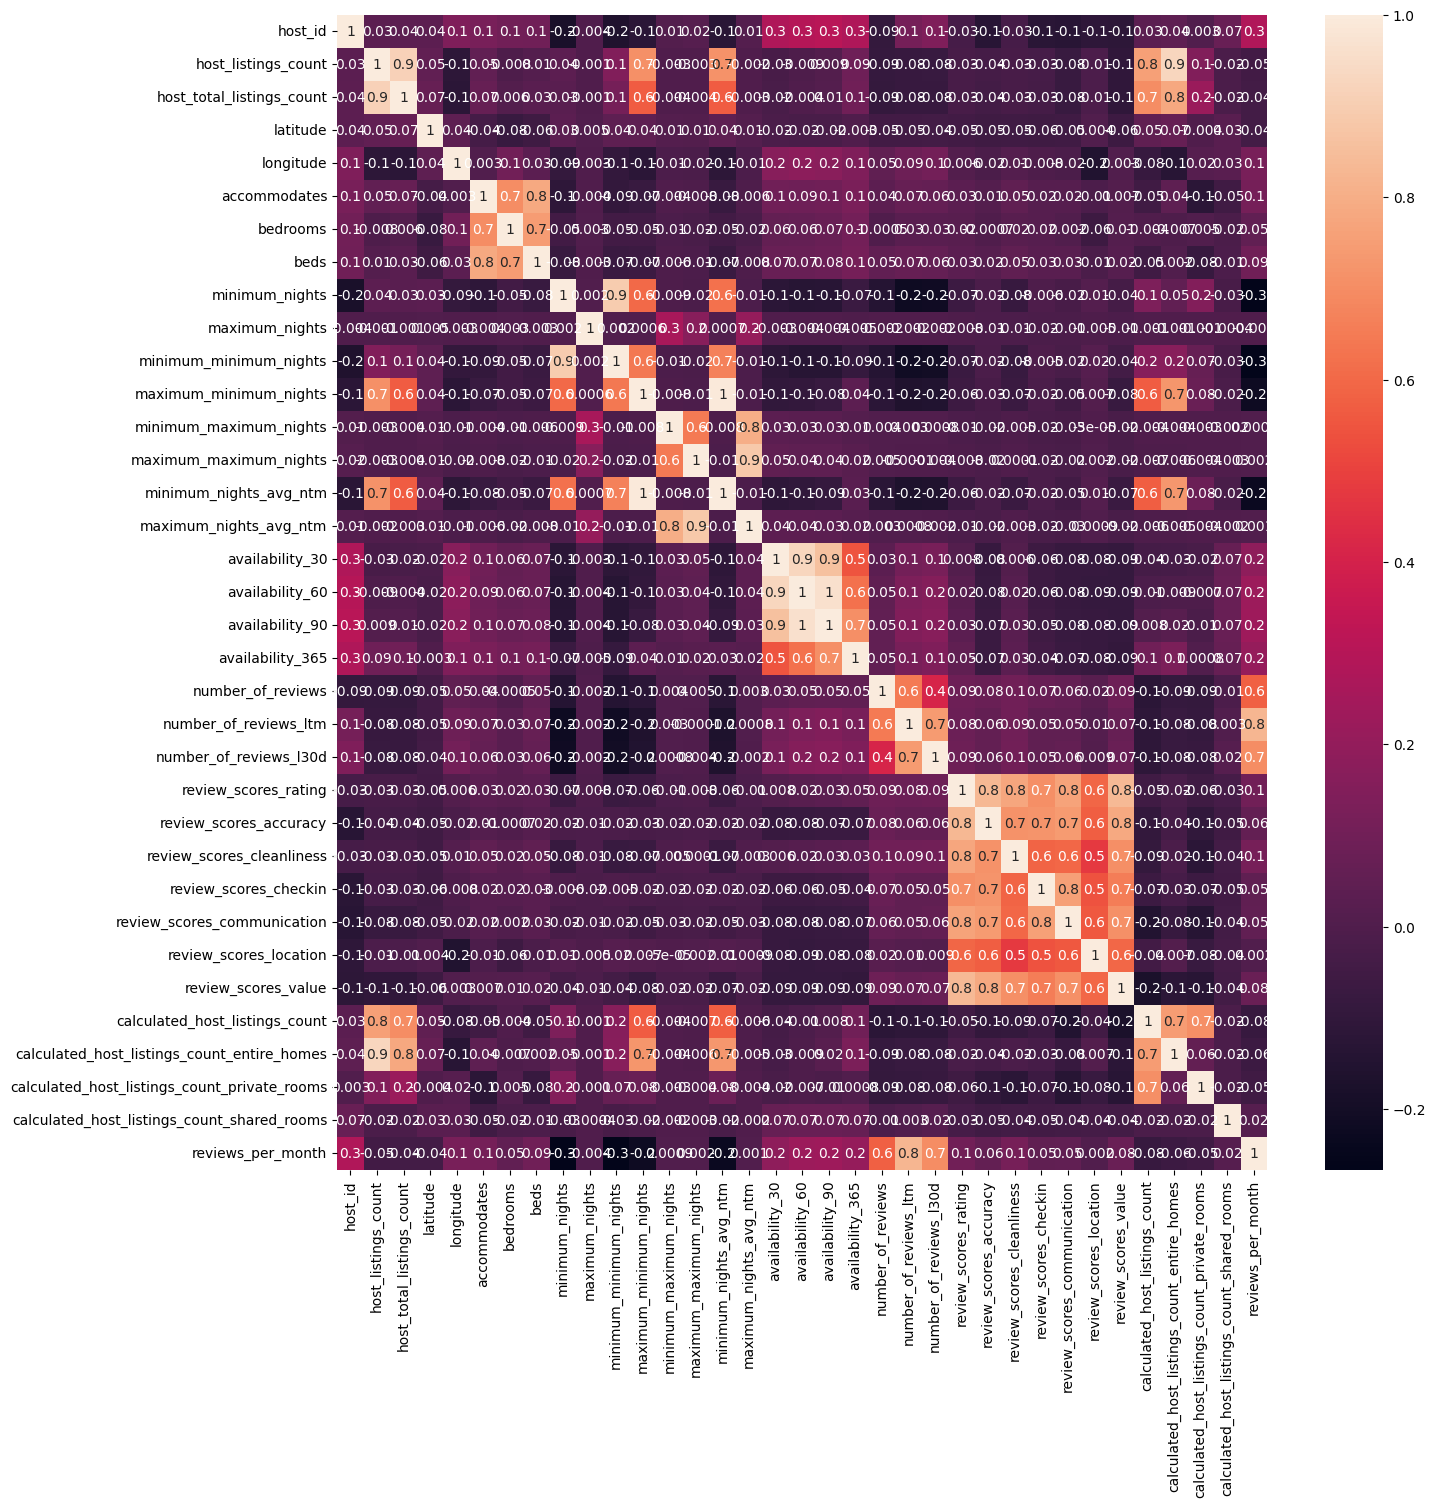

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(important_features_df.corr(numeric_only=True),annot=True,fmt='.1g')
plt.show()

#### Describe Data

In [20]:
important_features_df.describe()

host_id  host_listings_count  host_total_listings_count      latitude     longitude  accommodates      bedrooms          beds  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
count  4.356600e+04         43561.000000               43561.000000  43566.000000  43566.000000  43566.000000  25073.000000  42765.000000    43566.000000    4.356600e+04            43559.000000            43559.000000            4.355900e+04            4.355900e+04            43559.000000            4.355900e+04     43566.000000     43566.000000     43566.000000      43566.000000       43566.000000           43566.000000            43566.000000          33070.000000            32642.000000               32652.000000           32638.000000                 32647.000000            32635.000000         32635.000000                    43566.000000                                 43566.000000                                  43566.000000                                 43566.000000       33070.000000
mean   1.559275e+08           118.681366                 182.819472     40.728677    -73.943917      2.962700      1.592909      1.659067       18.700271    5.077550e+04               18.535343               24.224156            7.411357e+05            1.776467e+06               23.423141            1.270070e+06         6.891590        17.183652        29.667952        136.998256          26.368544               7.882110                0.779300              4.637119                4.744743                   4.632018               4.812121                     4.811478                4.728209             4.637749                       30.934857                                    15.215673                                     15.602672                                     0.069641           1.219748
std    1.655706e+08           597.547193                 868.767451      0.057564      0.056336      2.123375      0.922746      1.173349       27.804388    1.028948e+07               29.839159               49.257382            3.984455e+07            6.171182e+07               47.419207            4.989073e+07         9.914904        21.287386        32.551645        137.346191          57.740520              18.250976                1.932649              0.709516                0.468223                   0.539296               0.412980                     0.433894                0.407543             0.494366                       99.108628                                    70.223558                                     65.990305                                     0.776368           1.777084
min    1.678000e+03             1.000000                   1.000000     40.500314    -74.249840      0.000000      1.000000      1.000000        1.000000    1.000000e+00                1.000000                1.000000            1.000000e+00            1.000000e+00                1.000000            1.000000e+00         0.000000         0.000000         0.000000          0.000000           0.000000               0.000000                0.000000              0.000000                0.000000                   0.000000               0.000000                     0.000000                0.000000             0.000000                        1.000000                                     0.000000                                      0.000000                                     0.000000  

#### facts 

In [21]:
important_features_df.head(1)

name  host_id host_name  host_since  host_location host_response_time host_response_rate host_acceptance_rate host_is_superhost host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_identity_verified            neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates bathrooms_text  bedrooms  beds  \
0  Rental unit in New York · ★4.68 · Studio · 1 bed · 1 bath     2845  Jennifer  2008-09-09  Woodstock, NY       within a day                71%                  22%                 f            Midtown                  7.0                        9.0  ['email', 'phone', 'work_email']                      t  New York, United States                Midtown                    Manhattan  40.75356  -73.98559  Entire rental unit  Entire home/apt             1         1 bath       NaN   1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  review_scores_rating  review_scores_accuracy  \
0  ["Dedicated workspace", "Baking sheet", "Extra pillows and blankets", "Cleaning available during stay", "Essentials", "Hair dryer", "Free street parking", "TV", "Air conditioning", "Long term stays allowed", "Refrigerator", "Keypad", "Heating", "Ethernet connection", "Paid parking off premises", "Stove", "Bed linens", "Bathtub", "Iron", "Dishes and silverware", "Self check-in", "Smoke alarm", "Fire extinguisher", "Wifi", "Cooking basics", "Hangers", "Kitchen", "Oven", "Carbon monoxide alarm", "Luggage dropoff allowed", "Coffee maker", "Hot water"]  $240.00              30            1125                    30.0                    30.0                  1125.0                  1125.0                    30.0                  1125.0                t               19               20               50               325            2023-06-05                 49                      1                       0   2009-11-21  2022-06-21                  4.68                    4.73   

   review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month  
0                       4.63                   4.77                          4.8                    4.81                  4.4                f                               3                                            3                                             0                                            0                0.3

In [22]:
percentage_of_data_having_availbility_0 = round(len(important_features_df[important_features_df['availability_365'] == 0])/len(important_features_df['availability_365'])*100,2)

In [23]:
print(f'Percentage of hosts have Zeror avaialbility per year id {percentage_of_data_having_availbility_0} %')

Percentage of hosts have Zeror avaialbility per year id 32.14 %


#### get review count on avaialbility zero

In [24]:
important_features_df[important_features_df['availability_365'] == 0].groupby(['last_review']).size().sort_values(ascending=False).head(20)

last_review
2020-01-01    128
2020-01-02     83
2019-01-01     64
2018-01-01     62
2023-01-01     52
2020-01-03     42
2016-01-05     40
2023-01-02     39
2020-03-15     38
2019-12-29     38
2019-01-02     37
2018-01-02     37
2017-01-01     35
2016-01-02     35
2016-01-03     33
2020-03-08     33
2020-02-16     33
2023-05-21     32
2020-01-04     31
2017-01-02     31
dtype: int64

In [25]:
important_features_df.drop(['calendar_last_scraped'],inplace=True,axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\4281225803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.drop(['calendar_last_scraped'],inplace=True,axis=1)


#### Cleaning , Filling Null Data

In [26]:
important_features_df['neighbourhood'].fillna('New York, United States',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2240629394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['neighbourhood'].fillna('New York, United States',inplace=True)


In [27]:
important_features_df['neighbourhood'].isna().sum()

0

#### Since We Do Analysis To **New York City ** , Will Fill Empty Host Location With **New York, NY'**

In [28]:
important_features_df['host_location'].fillna('New York, NY',inplace= True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3290996404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_location'].fillna('New York, NY',inplace= True)


In [29]:
important_features_df['host_location'].isna().sum()

0

In [30]:
important_features_df[['host_response_time','host_response_rate','host_acceptance_rate']].dtypes

host_response_time      object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [31]:
important_features_df['host_response_time'].fillna('within an hour',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2593166318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_response_time'].fillna('within an hour',inplace=True)


In [32]:
important_features_df['host_response_time'].value_counts()

host_response_time
within an hour        32576
within a few hours     6130
within a day           3562
a few days or more     1298
Name: count, dtype: int64

In [33]:
important_features_df['host_response_rate'].fillna('100%',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2427138067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_response_rate'].fillna('100%',inplace=True)


In [34]:
important_features_df['host_response_rate'].isna().sum()

0

In [35]:
important_features_df['host_acceptance_rate'].fillna('100%',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\1549431179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_acceptance_rate'].fillna('100%',inplace=True)


In [36]:
important_features_df['host_neighbourhood'].fillna('Bedford-Stuyvesant',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3514331753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_neighbourhood'].fillna('Bedford-Stuyvesant',inplace=True)


In [37]:
important_features_df['host_neighbourhood'].value_counts()

host_neighbourhood
Bedford-Stuyvesant    11444
Williamsburg           2036
Bushwick               1500
Jamaica                1412
Flushing               1319
                      ...  
Somerset                  1
Shoreditch                1
Sunnyvale                 1
Merkaz HaIr               1
Barra da Tijuca           1
Name: count, Length: 544, dtype: int64

In [38]:
important_features_df['host_is_superhost'].fillna('f',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3527304007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_is_superhost'].fillna('f',inplace=True)


In [39]:
important_features_df['host_is_superhost'].isna().sum()

0

In [40]:
important_features_df['bathrooms_text'].fillna('1 bath',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3137006560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['bathrooms_text'].fillna('1 bath',inplace=True)


In [41]:
important_features_df['bedrooms'].fillna(1.0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\578339688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['bedrooms'].fillna(1.0,inplace=True)


In [42]:
important_features_df['beds'].fillna(1.0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\1306825442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['beds'].fillna(1.0,inplace=True)


In [43]:
important_features_df['minimum_minimum_nights'].fillna(30.0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2675743048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['minimum_minimum_nights'].fillna(30.0,inplace=True)


In [44]:
important_features_df[['maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']].mode()

maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm
0                    30.0                  1125.0                  1125.0                    30.0                  1125.0

In [45]:
important_features_df['maximum_minimum_nights'].fillna(30.0,inplace=True)
important_features_df['minimum_maximum_nights'].fillna(1125.0,inplace=True)
important_features_df['maximum_maximum_nights'].fillna(1125.0	,inplace=True)
important_features_df['minimum_nights_avg_ntm'].fillna(30.0,inplace=True)
important_features_df['maximum_nights_avg_ntm'].fillna(1125.0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3019772300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['maximum_minimum_nights'].fillna(30.0,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3019772300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['minimum_maximum_nights'].fillna(1125.0,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3019772300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [46]:
important_features_df['host_name'].fillna('Others',inplace=True)
important_features_df['host_since'].fillna('2016-12-16',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3081657836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_name'].fillna('Others',inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3081657836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_since'].fillna('2016-12-16',inplace=True)


In [47]:
important_features_df.isna().sum()

name                                                0
host_id                                             0
host_name                                           0
host_since                                          0
host_location                                       0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_neighbourhood                                  0
host_listings_count                                 5
host_total_listings_count                           5
host_verifications                                  5
host_identity_verified                              5
neighbourhood                                       0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

In [48]:
cleaned_df = important_features_df

#### Remove Duplicated Data

In [49]:
cleaned_df.duplicated().sum()

26

In [50]:
cleaned_df.drop_duplicates(inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\181483249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


In [51]:
cleaned_df.duplicated().sum()

0

In [52]:
cleaned_df['first_review'].fillna('No Review',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\527722239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['first_review'].fillna('No Review',inplace=True)


In [53]:
cleaned_df['last_review'].fillna('No Review',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\3387051314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['last_review'].fillna('No Review',inplace=True)


In [54]:
cleaned_df['review_scores_rating'].fillna(0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2426808428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['review_scores_rating'].fillna(0,inplace=True)


In [55]:
cleaned_df.fillna({'review_scores_accuracy':0,'review_scores_cleanliness':0,
                   'review_scores_checkin':0,'review_scores_communication':0,
                   'review_scores_location':0,'review_scores_value':0,'review_scores_rating':0
                  },inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_14220\83538176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.fillna({'review_scores_accuracy':0,'review_scores_cleanliness':0,


In [56]:
cleaned_df['reviews_per_month'].fillna(0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2445298058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['reviews_per_month'].fillna(0,inplace=True)


In [57]:
cleaned_df.isna().sum()

name                                            0
host_id                                         0
host_name                                       0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             5
host_total_listings_count                       5
host_verifications                              5
host_identity_verified                          5
neighbourhood                                   0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0


In [58]:
cleaned_df.duplicated().sum()

0

## Since Data is cleaned and no duplication , Let's analyse data with ***visualization tools***

### 1. Top 10 Host name

In [59]:
cleaned_df.columns

Index(['name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_sc

In [60]:
cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10]

host_name
Blueground      568
RoomPicks       506
Eugene          494
June            422
Michael         353
David           309
Outpost Club    264
Hiroki          235
Shogo           219
Momoyo          207
Name: count, dtype: int64

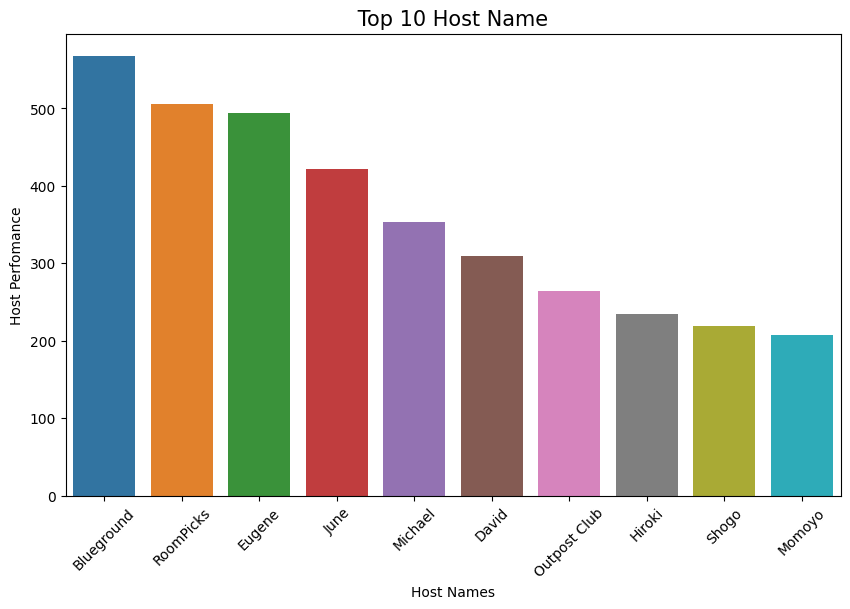

In [61]:
plt.figure(figsize=(10,6))

sns.barplot(data = cleaned_df,x=cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10].keys(),
y = cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10])
plt.title(' Top 10 Host Name ',fontsize = 15)
plt.xlabel('Host Names')
plt.ylabel('Host Perfomance')
plt.xticks(rotation=45)
plt.show()

### Observation
1. Host name is the name of the host who listed the hotel in the airbnb.
2. It looks like the Blueground has the largest booking under his name with 568 bookings
3. RoomPICKS is the host name with 506 bookings.

### 2. neighbourhood.
 - Represent NYC neighbourhood

In [62]:
cleaned_df['host_neighbourhood'].value_counts()[:10]

host_neighbourhood
Bedford-Stuyvesant    11438
Williamsburg           2036
Bushwick               1500
Jamaica                1412
Flushing               1319
Crown Heights          1166
Flatbush               1038
Upper East Side         923
Harlem                  879
Hell's Kitchen          715
Name: count, dtype: int64

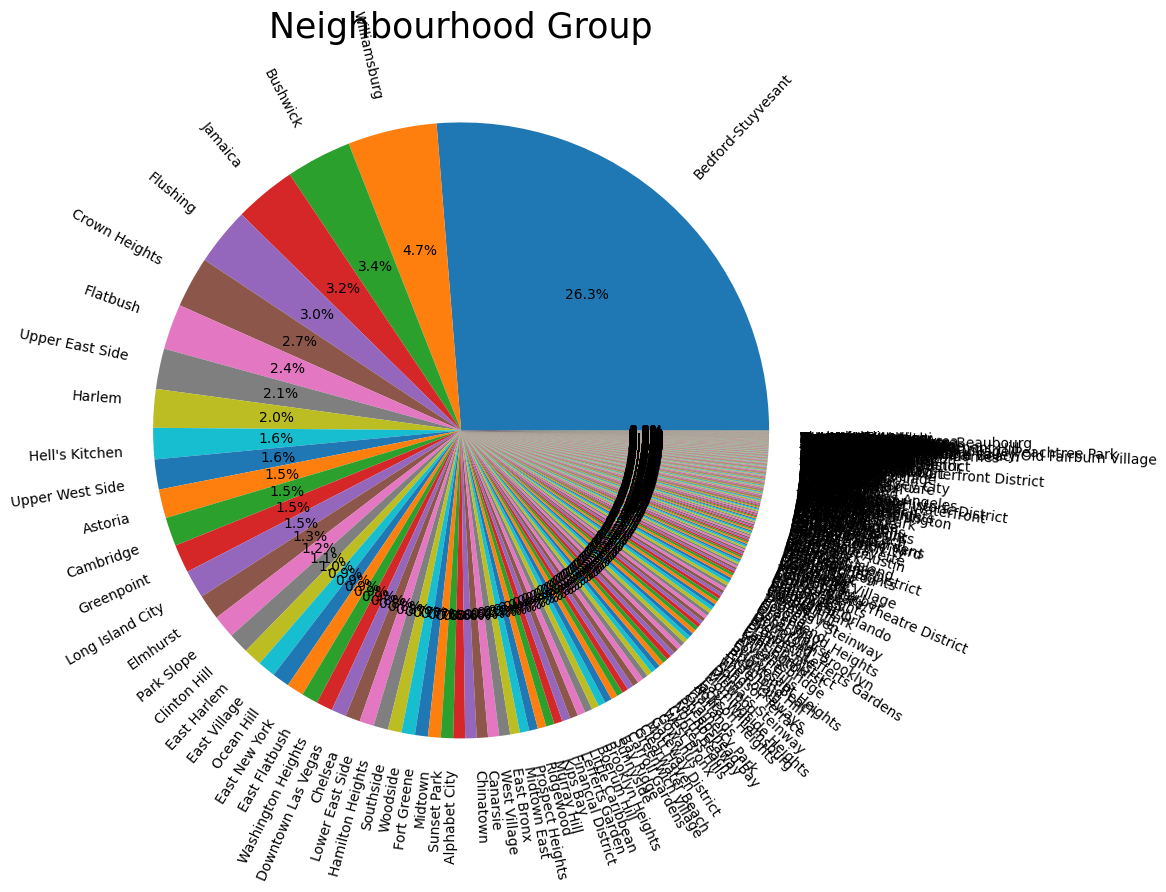

In [63]:
plt.figure(figsize=(10,10))
plt.pie(x = cleaned_df['host_neighbourhood'].value_counts(),
        labels=cleaned_df['host_neighbourhood'].value_counts().keys(),
        rotatelabels=True,autopct = '%1.1f%%'
       )
plt.title("Neighbourhood Group", fontsize = 25)
plt.show()

In [64]:
cleaned_df['host_neighbourhood'].value_counts()[:10]

host_neighbourhood
Bedford-Stuyvesant    11438
Williamsburg           2036
Bushwick               1500
Jamaica                1412
Flushing               1319
Crown Heights          1166
Flatbush               1038
Upper East Side         923
Harlem                  879
Hell's Kitchen          715
Name: count, dtype: int64

### Observation
1. **neighbourhood** : Name of Each boroughs of NYC, New York, United States, Brooklyn,Queens,Bronx, State Island.
2. It looks like Bedford-Stuyvesant United States group has the largest bookings
3. Followed by Williamsburg with 4.7% share.

### 4. Finding the top 10 host_id
#### Host_id - Unique ID for host who have listed the property on Airbnb.

In [65]:
# Finding the value count
df['host_id'].value_counts().reset_index().iloc[:10]

host_id  count
0  107434423    569
1    3223938    487
2  305240193    412
3  496944100    342
4   19303369    235
5  200239515    219
6  204704622    207
7  162280872    176
8  137358866    142
9  501999278    138

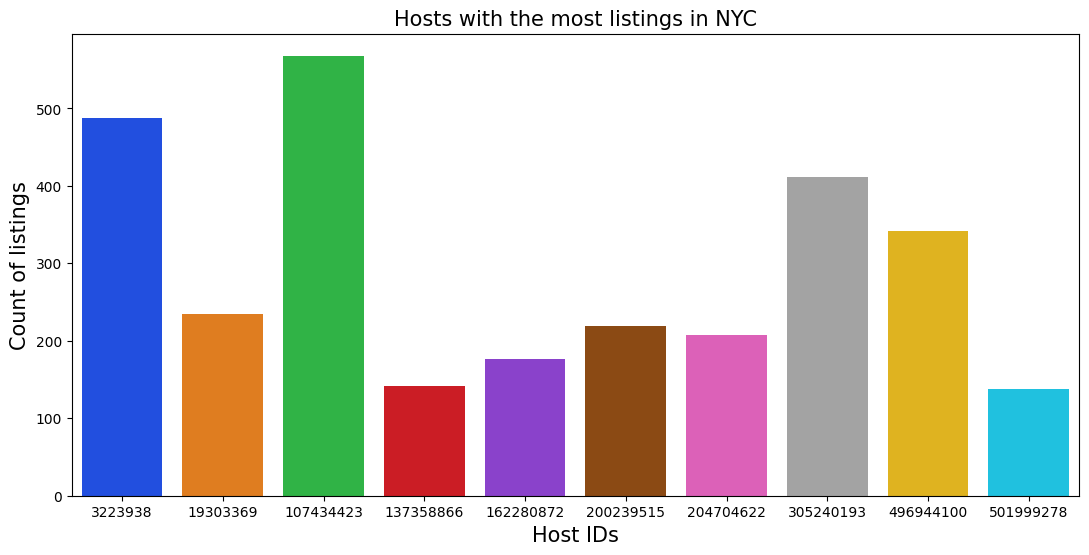

In [66]:
plt.figure(figsize = (13,6))
sns.barplot(x=cleaned_df['host_id'].value_counts().iloc[:10].keys(), y=cleaned_df['host_id'].value_counts().iloc[:10], data=cleaned_df,
                 palette='bright')
plt.title("Hosts with the most listings in NYC", fontsize = 15)
plt.xlabel("Host IDs", fontsize = 15)
plt.ylabel("Count of listings", fontsize = 15)
plt.show()

### Observation
1. We can see that there is a good distribution between top 10 hosts with the most listings.
2. third host has more than 500+ listings.

### 5. Neighbourhood according to price

In [67]:
cleaned_df['price'] = pd.to_numeric(cleaned_df['price'].apply(lambda price : price[1:]).apply(lambda price :price.replace(',','')))

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2148382532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price'] = pd.to_numeric(cleaned_df['price'].apply(lambda price : price[1:]).apply(lambda price :price.replace(',','')))


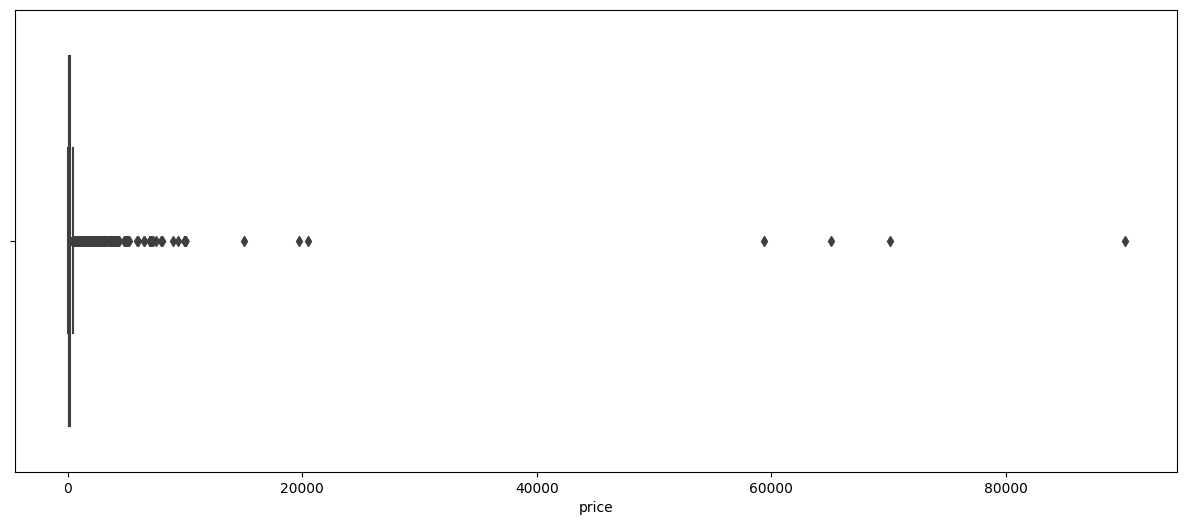

In [68]:
plt.figure(figsize=(15,6))
sns.boxplot(x = cleaned_df['price'])
plt.show()

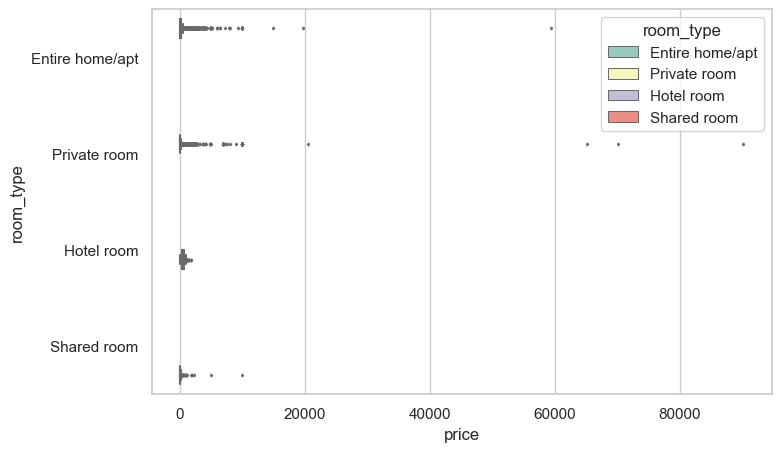

In [430]:
df_price=cleaned_df[cleaned_df['price']!=0].copy()
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5,data=df_price)
plt.show()

**we can notice that there are many outliers for price  in each of the room_type  category, so lets just why there is so high price or what else we can conclude for hosts having highest price for the rooms**

In [69]:
cleaned_df['price'].describe()

count    43540.000000
mean       225.037184
std        818.835580
min          0.000000
25%         80.000000
50%        136.000000
75%        228.000000
max      90120.000000
Name: price, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\527674644.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = cleaned_df['price'])


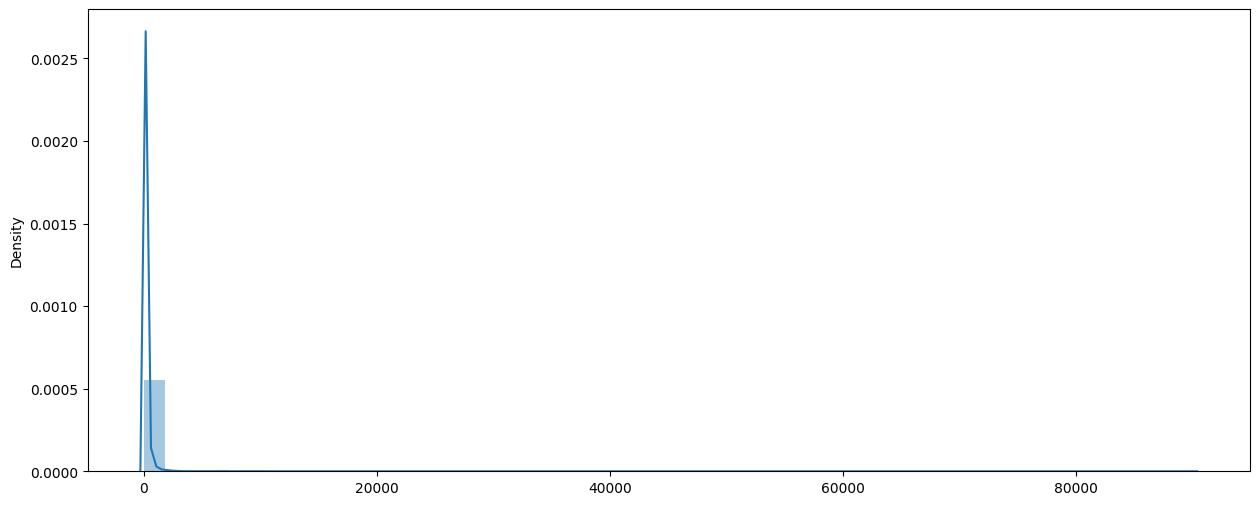

In [70]:
plt.figure(figsize=(15,6))
sns.distplot(x = cleaned_df['price'])
plt.show()

### Calculating the interquartile ranges

In [71]:
Q1 = cleaned_df['price'].quantile(0.25)
Q3 = cleaned_df['price'].quantile(0.75)
Q2 = cleaned_df['price'].median()
IQR = Q3 - Q1

In [72]:
print('The IQR is',IQR)
print('The Minimum value is', (Q3 - (1.5* (IQR))))
print('The maximum value is', (Q3 + (1.5* (IQR))))

The IQR is 148.0
The Minimum value is 6.0
The maximum value is 450.0


In [73]:
df_new = cleaned_df[cleaned_df['price'] < 450.0 ]

In [74]:
cleaned_df.groupby(['host_neighbourhood'])['price'].describe().T.reset_index()

host_neighbourhood  index  Abbotsford  Addisleigh Park    Allerton  Alphabet City  Anaheim Resort  Anc￳n Sur    Annadale  Arden Heights    Arrochar    Arverne      Astoria  Astrodome  Auburdale  Auburndale  Bancroft  Bankers Hill  Barra da Tijuca  Barrier Island  Barrio El Golf  Barrio Norte  Bath Beach  Battery Park City    Bay Ridge  Baychester     Bayside  Bear Creek  Bedford Park  Bedford-Stuyvesant  Bel-Air  Bela Vista  Belle Harbor  Belltown  Belmar     Belmont  Bensonhurst  Bergen Beach  Bergen-Lafayette  Beverly Woods  Block E2  Boerum Hill  Borough Park   Briarwood     Brickell  Bridge Plaza  Brighton Beach  Bristol/Warner  Broadway Triangle  Bromley-by-Bow   Bronxdale    Brooklyn  Brooklyn Heights  Brooklyn Navy Yard  Browncroft  Brownsville  Bull Durham  Bull's Head  Bulls Head    Bushwick  Byward Market - Parliament Hill  Cambria Heights    Cambridge  Camelot Estates Townhomes     Canarsie      Canggu  Cannes  Capitol Hill  Carroll Gardens  \
0                   count         1.0              1.0   30.000000     270.000000        4.000000        1.0    2.000000       3.000000   10.000000   80.00000   658.000000        1.0        1.0         1.0       1.0           1.0              1.0             1.0             1.0           1.0   25.000000          24.000000   165.000000   41.000000   20.000000         1.0     13.000000        11438.000000      1.0    2.000000           1.0       1.0     1.0   28.000000    69.000000     24.000000          25.00000       4.000000       1.0   178.000000     43.000000    7.000000     6.000000     15.000000       83.000000             1.0            3.00000             2.0   10.000000    6.000000        173.000000           23.000000         1.0    74.000000    10.000000          1.0    5.000000  1500.00000                              1.0         4.000000   656.000000                   2.000000   256.000000    2.000000     1.0      2.000000       161.000000   
1                    mean       100.0            160.0  203.733333     196.529630      306.000000      119.0  161.000000     122.333333  122.400000  181.16250   136.937690      158.0      275.0       475.0     166.0         164.0            112.0           801.0           280.0          98.0  176.480000         243.083333   154.951515  121.170732  129.900000        44.0     78.076923          240.230810     62.0  119.500000         232.0    7314.0   295.0  129.892857   119.492754    222.333333         117.00000     147.500000      60.0   302.595506    104.697674  144.000000   583.666667    415.000000      172.349398           454.0          228.00000           250.0   70.600000  121.333333        259.387283          172.043478        65.0   143.797297   140.900000         60.0  302.800000   121.13400                            191.0        83.250000   402.195122                 160.500000   199.343750  130.500000    50.0     90.000000       256.124224   
2                     std         NaN              NaN  178.684838     365.948761       36.724197        NaN   76.367532      41.307788   62.172162   90.98149   335.604161        NaN        NaN         NaN       NaN           NaN              NaN             NaN             NaN           NaN  195.859244         141.193335   408.465224  101.865574   57.874547         NaN     49.117990          399.731509      NaN   30.405592           NaN       NaN     NaN  131.526462    59.760213    119.330257          19.00877     120.903543       NaN   266.631137     70.821888   68.310565   349.563537    319.585893      139.080994             NaN          199.16576             0.0   22.539841   45.881006        162.591102          135.431458         NaN   131.160675    38.144317          NaN  237.308238   117.39295                              NaN        25.863423   153.767024                  19.091883   731.939518    7.778175     NaN     56.568542       268.909877   
3                     min       100.0            160.0   39.000000      48.000000      272.000000      119.0  107.000000    

In [75]:
df_new.groupby(['host_neighbourhood'])['price'].describe().T.reset_index()

host_neighbourhood  index  Abbotsford  Addisleigh Park    Allerton  Alphabet City  Anaheim Resort  Anc￳n Sur    Annadale  Arden Heights    Arrochar     Arverne     Astoria  Astrodome  Auburdale  Bancroft  Bankers Hill  Barra da Tijuca  Barrio El Golf  Barrio Norte  Bath Beach  Battery Park City   Bay Ridge  Baychester     Bayside  Bear Creek  Bedford Park  Bedford-Stuyvesant  Bel-Air  Bela Vista  Belle Harbor  Belmar     Belmont  Bensonhurst  Bergen Beach  Bergen-Lafayette  Beverly Woods  Block E2  Boerum Hill  Borough Park   Briarwood  Brickell  Bridge Plaza  Brighton Beach  Broadway Triangle  Bromley-by-Bow   Bronxdale    Brooklyn  Brooklyn Heights  Brooklyn Navy Yard  Browncroft  Brownsville  Bull Durham  Bull's Head  Bulls Head     Bushwick  Byward Market - Parliament Hill  Cambria Heights   Cambridge  Camelot Estates Townhomes    Canarsie      Canggu  Cannes  Capitol Hill  Carroll Gardens  Cascade Green/Heritage Valley/Old Fairburn Village  Castle Hill   Castleton Corners  \
0                   count         1.0              1.0   25.000000     258.000000        4.000000        1.0    2.000000       3.000000   10.000000   77.000000  644.000000        1.0        1.0       1.0           1.0              1.0             1.0           1.0   24.000000          22.000000  162.000000   40.000000   20.000000         1.0     13.000000        10215.000000      1.0    2.000000           1.0     1.0   27.000000    69.000000     22.000000          25.00000       4.000000       1.0   142.000000     43.000000    7.000000       1.0     12.000000       78.000000           2.000000             2.0   10.000000    6.000000        162.000000           22.000000         1.0    71.000000    10.000000          1.0    3.000000  1477.000000                              1.0         4.000000  475.000000                   2.000000  252.000000    2.000000     1.0      2.000000       144.000000                                             2.00000      3.000000           5.000000   
1                    mean       100.0            160.0  135.920000     144.875969      306.000000      119.0  161.000000     122.333333  122.400000  168.649351  112.066770      158.0      275.0     166.0         164.0            112.0           280.0          98.0  142.208333         212.727273  111.833333  111.700000  129.900000        44.0     78.076923          164.130299     62.0  119.500000         232.0   295.0  108.777778   119.492754    194.545455         117.00000     147.500000      60.0   187.704225    104.697674  144.000000     118.0    273.000000      146.794872         117.000000           250.0   70.600000  121.333333        230.888889          149.545455        65.0   126.380282   140.900000         60.0  132.666667   111.104265                            191.0        83.250000  334.383158                 160.500000  130.361111  130.500000    50.0     90.000000       186.222222                                           154.50000    115.333333         123.000000   
2                     std         NaN              NaN   92.947978      72.286665       36.724197        NaN   76.367532      41.307788   62.172162   65.473531   66.027707        NaN        NaN       NaN           NaN              NaN             NaN           NaN   96.893478          98.412728   68.045039   82.890784   57.874547         NaN     49.117990           95.288189      NaN   30.405592           NaN     NaN   70.715755    59.760213     76.249420          19.00877     120.903543       NaN    93.623267     70.821888   68.310565       NaN     78.519251       92.555825          73.539105             0.0   22.539841   45.881006         97.018728           83.779602         NaN    99.494489    38.144317          NaN   48.180217    76.258564                              NaN        25.863423   67.534930                  19.091883   67.081865    7.778175     NaN     56.568542        91.790918                                             2.12132     39.272552          75.591005   
3                   

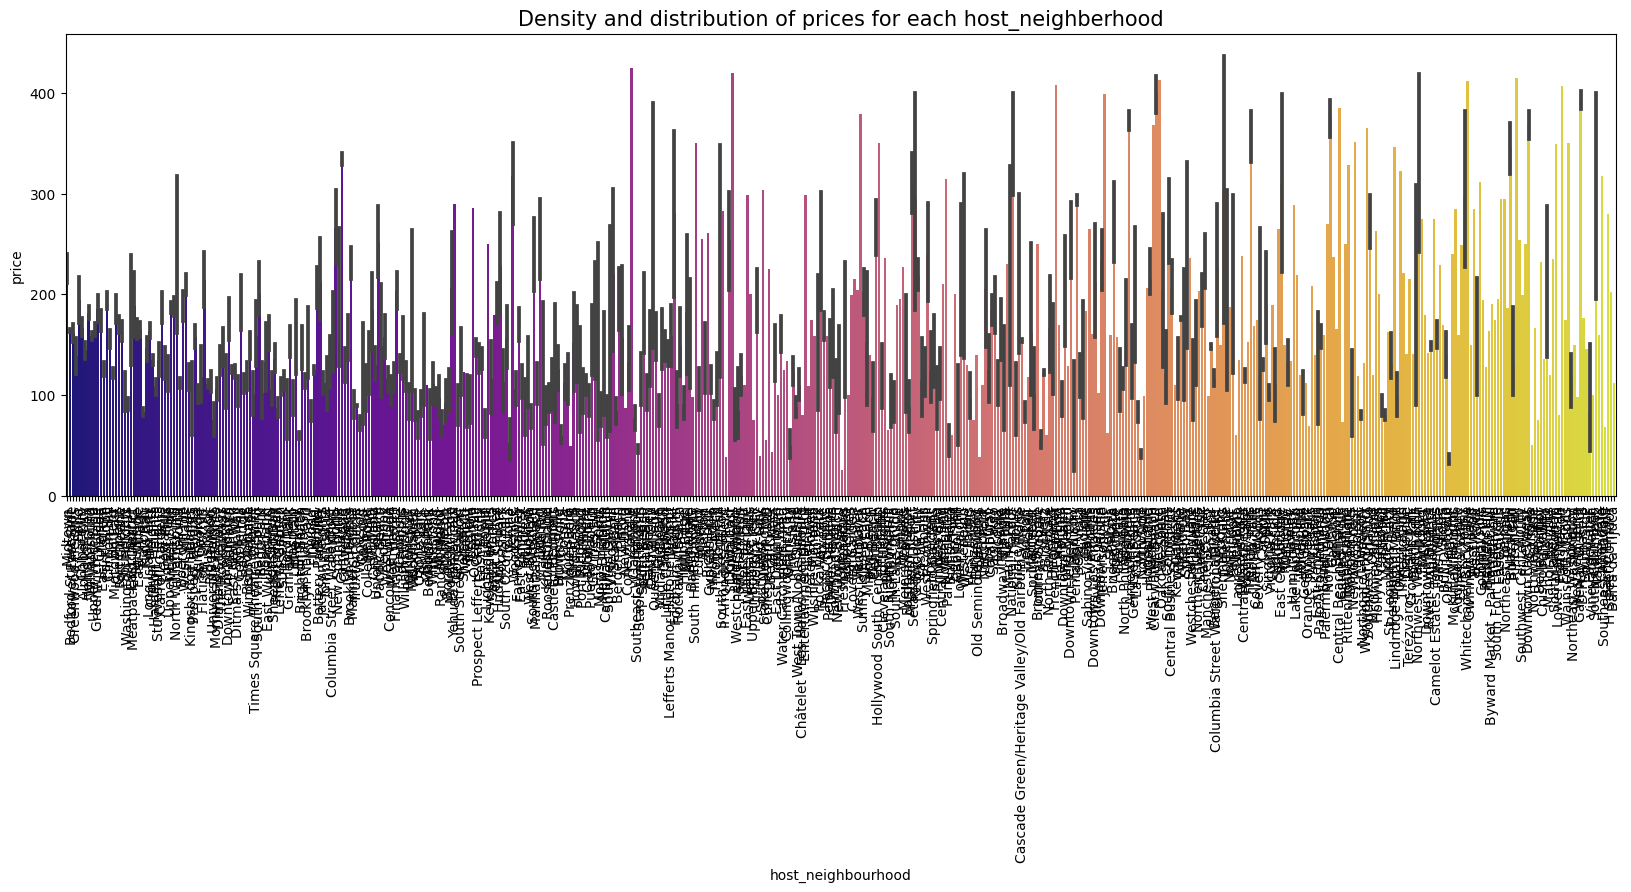

In [84]:
plt.figure(figsize = (20,6))
sns.barplot(df_new, x='host_neighbourhood',y='price',palette ='plasma')
plt.title('Density and distribution of prices for each host_neighberhood', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

### room_type 

In [77]:
cleaned_df['room_type'].value_counts()

room_type
Entire home/apt    24630
Private room       18179
Shared room          580
Hotel room           151
Name: count, dtype: int64

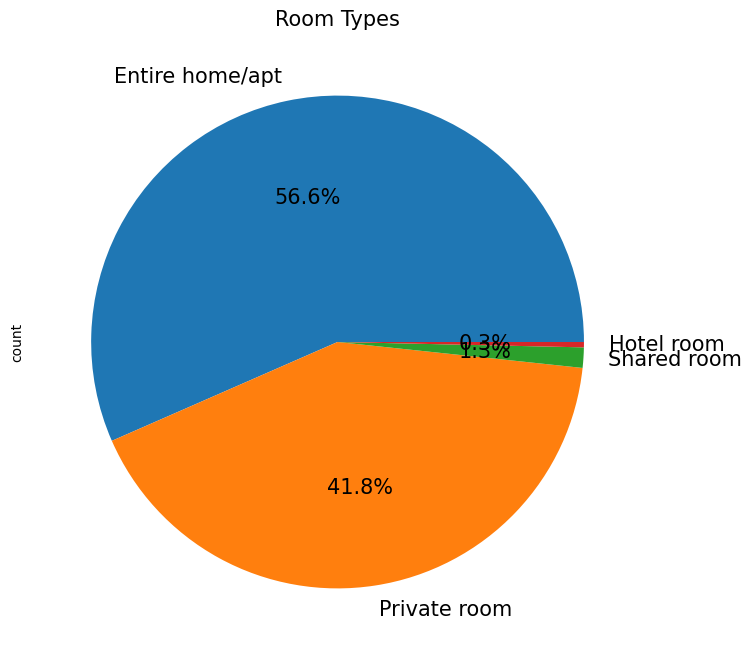

In [78]:
plt.figure(figsize=(8,5))
cleaned_df['room_type'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15, autopct = '%1.1f%%')
plt.title("Room Types", fontsize = 15)
plt.show()

### Observation
1. Most of the people happen to rent the entire home or apartment which constitutes to 56.6% according to the chart.
2. Followed by 41.8% people consider having private room, and shared is the least considered room type.

### Avg price per room_type 

In [79]:
cleaned_df.groupby(['room_type'])['price'].mean().reset_index()

room_type       price
0  Entire home/apt  273.330613
1       Hotel room  483.615894
2     Private room  160.622311
3      Shared room  125.874138

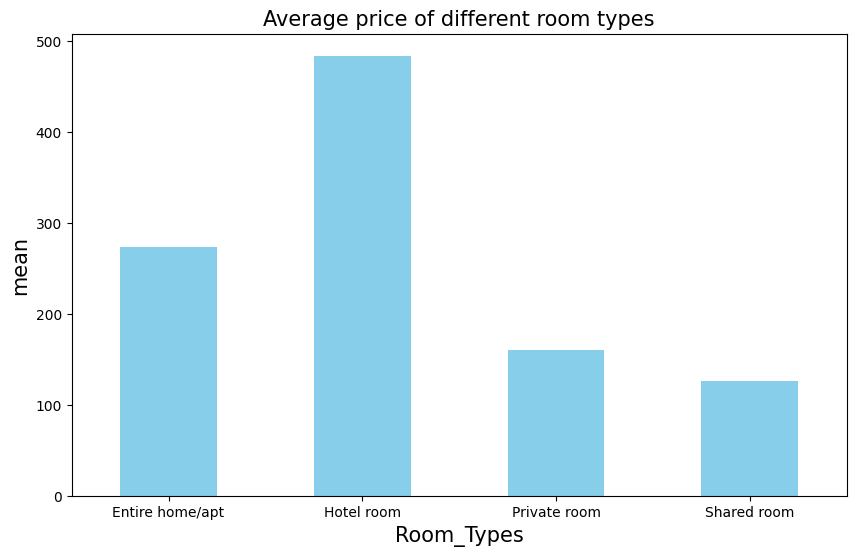

In [80]:
cleaned_df.groupby(['room_type'])['price'].mean().plot(kind='bar', figsize = (10,6), color = 'skyblue')
plt.xticks( rotation = 360)
plt.title("Average price of different room types", fontsize = 15)
plt.xlabel('Room_Types', fontsize = 15)
plt.ylabel('mean', fontsize = 15)
plt.show()

In [81]:
cleaned_df.groupby(['room_type'])['price'].describe()

count        mean          std   min    25%    50%    75%      max
room_type                                                                            
Entire home/apt  24630.0  273.330613   554.472172  10.0  133.0  190.0  289.0  59386.0
Hotel room         151.0  483.615894   355.923641   0.0  253.5  410.0  601.5   1880.0
Private room     18179.0  160.622311  1082.800710  10.0   55.0   79.0  115.0  90120.0
Shared room        580.0  125.874138   491.742666  15.0   41.0   60.0   99.0  10000.0

<Figure size 1000x500 with 0 Axes>

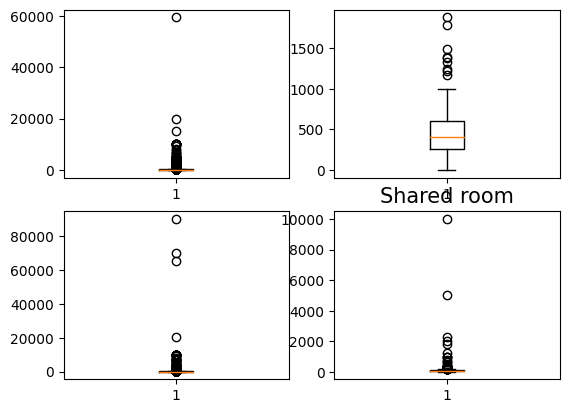

In [82]:
plt.figure(figsize = (10,5))

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)

entire = cleaned_df[cleaned_df['room_type'] == 'Entire home/apt']
ax1.boxplot(x  = entire['price'])
plt.title("Entire home/apt", fontsize = 15)

private = cleaned_df[cleaned_df['room_type'] == 'Hotel room']
ax2.boxplot(x  = private['price'])
plt.title("Private room", fontsize = 15)

private = cleaned_df[cleaned_df['room_type'] == 'Private room']
ax3.boxplot(x  = private['price'])
plt.title("Private room", fontsize = 15)

shared = cleaned_df[cleaned_df['room_type'] == 'Shared room']
ax4.boxplot(x  = shared['price'])
plt.title("Shared room", fontsize = 15)

plt.show()

###  ** What can we learn about different hosts and areas?**

In [100]:
host_areas =cleaned_df.groupby(['host_name','host_neighbourhood'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(5)

host_name  host_neighbourhood  calculated_host_listings_count
2636   Blueground           Cambridge                             569
6329       Eugene            Flatbush                             487
10252        June  Bedford-Stuyvesant                             412
16914   RoomPicks  Downtown Las Vegas                             342
7892       Hiroki            Elmhurst                             235

## Observation
### We find that Host name **Blueground** has listed highest number of listings in **Cambridge** followed by Blueground

### **What we learn from room type and their prices according to area?**

In [118]:
room_price_area_wise = cleaned_df.groupby(['host_neighbourhood','room_type'])['price'].max().reset_index()
#room_price_area_wise.sort_values(by='price', ascending=False)

room_price_area_wise.sort_values("price",ascending=False).head(10)


host_neighbourhood        room_type    price
293            Flushing     Private room  90120.0
238       East Flatbush     Private room  70100.0
856       West Brighton     Private room  65115.0
240         East Harlem  Entire home/apt  59386.0
369              Harlem     Private room  20500.0
429           Kitsilano  Entire home/apt  19750.0
43   Bedford-Stuyvesant  Entire home/apt  15000.0
352          Greenpoint     Private room  10000.0
521             Midtown     Private room  10000.0
407             Jamaica     Private room  10000.0

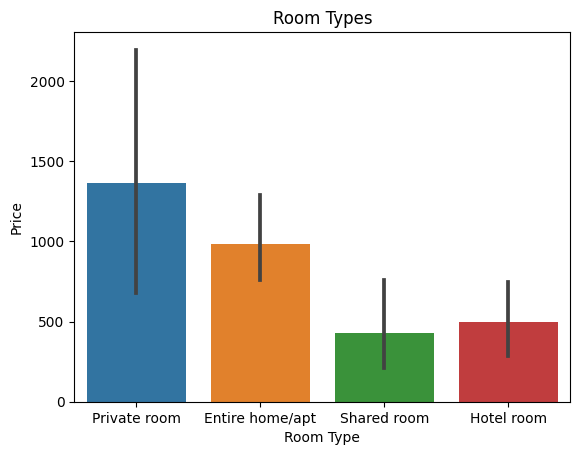

In [121]:
sns.barplot(data=room_price_area_wise,x = 'room_type',y='price')
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

## Observation
### We found that **Private room** are too expensive in ** Flushing ** and  **East Flatbush**	. 

In [188]:
#sampel_ptype_listing_counts = cleaned_df.groupby(['host_neighbourhood','room_type','property_type'])['host_total_listings_count'].max().sort_values(ascending=False).reset_index().head(50)

sampel_ptype_listing_counts = cleaned_df.groupby(['host_neighbourhood','property_type','room_type'])['host_total_listings_count'].max().sort_values(ascending=False).reset_index().head(10)
sampel_ptype_listing_counts

host_neighbourhood              property_type        room_type  host_total_listings_count
0        North Beach              Room in hotel     Private room                     8918.0
1        North Beach  Entire serviced apartment  Entire home/apt                     8918.0
2        North Beach            Entire home/apt  Entire home/apt                     8918.0
3   Clearwater Beach              Room in hotel     Private room                     7953.0
4   Clearwater Beach  Entire serviced apartment  Entire home/apt                     7953.0
5   Clearwater Beach         Entire rental unit  Entire home/apt                     7953.0
6   Clearwater Beach            Entire home/apt  Entire home/apt                     7953.0
7          Cambridge         Entire rental unit  Entire home/apt                     5578.0
8        Charter Oak         Entire rental unit  Entire home/apt                     4913.0
9  Southwest Orlando               Entire condo  Entire home/apt                     2776.0

In [261]:
sampel_ptype_listing_counts.columns


Index(['host_neighbourhood', 'property_type', 'room_type', 'host_total_listings_count'], dtype='object')

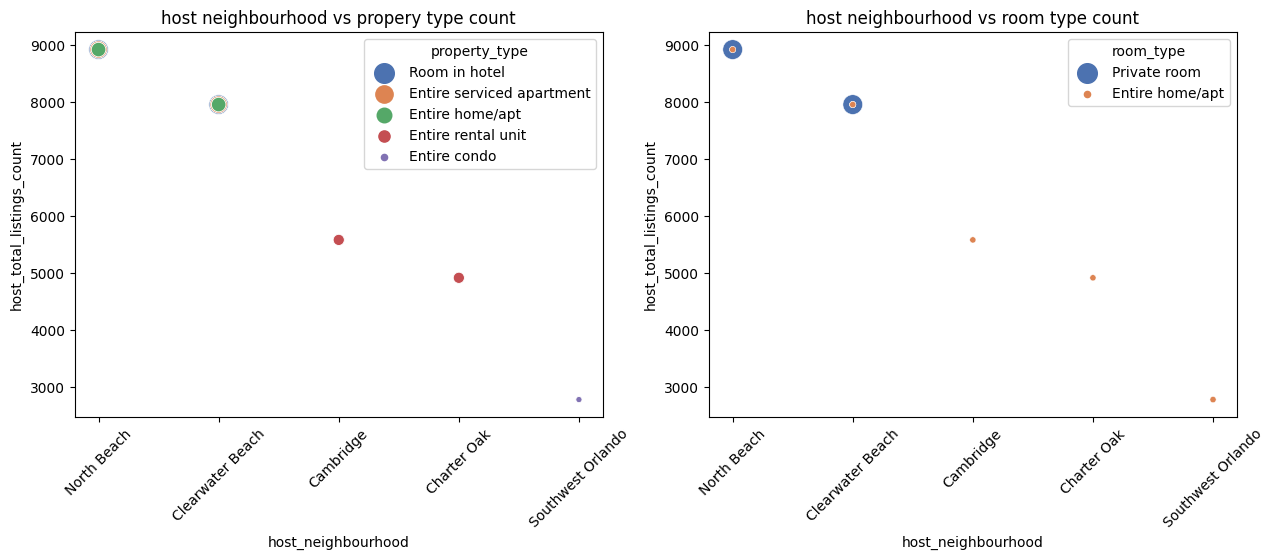

In [306]:
plt.figure(figsize=(15,5))
axes1 = plt.subplot(1, 2, 1)
sns.scatterplot(data = sampel_ptype_listing_counts,x = 'host_neighbourhood',y='host_total_listings_count',hue='property_type',size='property_type',ax=axes1,sizes=(20, 200), legend="full",palette="deep")
plt.title('host neighbourhood vs propery type count')
plt.xticks(rotation=45)

axes2= plt.subplot(1, 2, 2)
sns.scatterplot(data = sampel_ptype_listing_counts,x = 'host_neighbourhood',y='host_total_listings_count',hue='room_type',size='room_type',ax=axes2,sizes=(20, 200), legend="full",palette="deep")
plt.title('host neighbourhood vs room type count')
plt.xticks(rotation=45)
plt.show()

### **What can we learn from Data? (ex: locations, prices, reviews, etc)**

In [338]:
neighbourhood_reviews = cleaned_df.groupby(['neighbourhood'])['number_of_reviews'].max().sort_values(ascending=False).reset_index()
neighbourhood_reviews.head()

area_reviews = cleaned_df.groupby(['host_neighbourhood'])['number_of_reviews'].max().sort_values(ascending=False).reset_index()
#area_reviews.head()


neighbourhood  number_of_reviews
0                  New York, United States               2024
1          Queens, New York, United States                770
2        Brooklyn, New York, United States                763
3  East elmhurst , New York, United States                614
4       Brooklyn , New York, United States                570

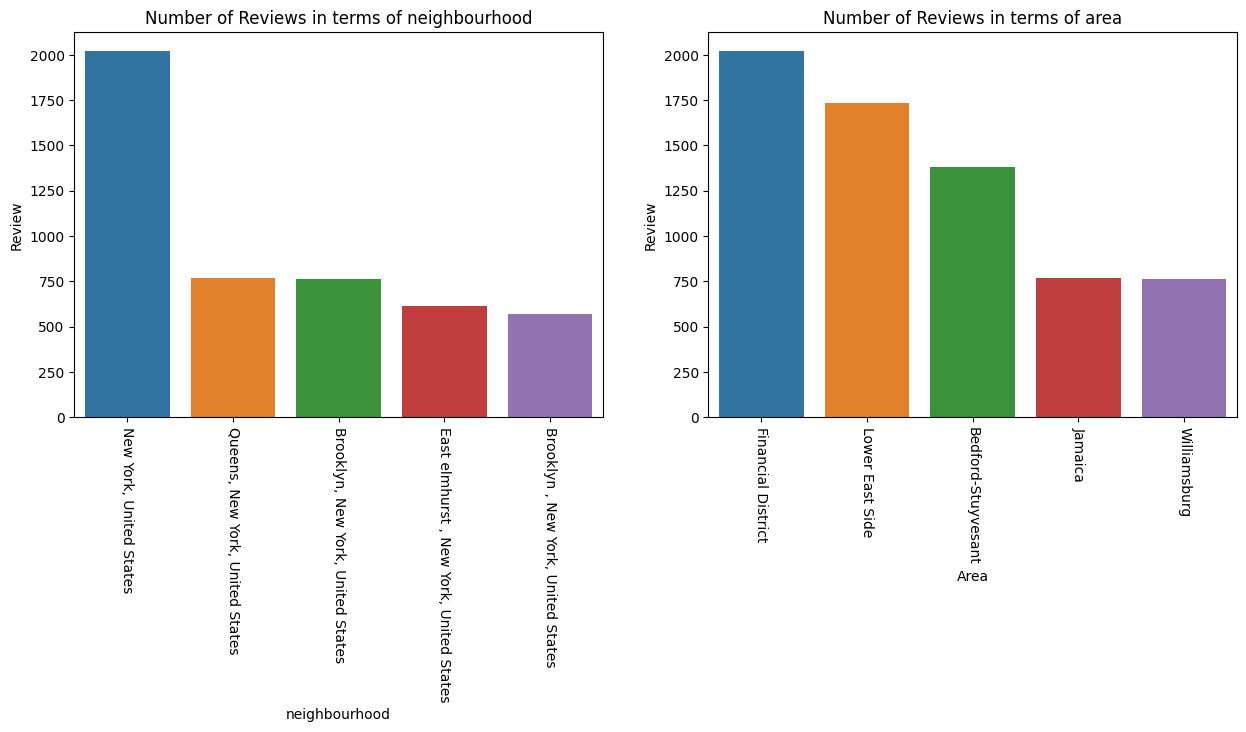

In [335]:
plt.figure(figsize=(15,5))
axes1 = plt.subplot(1, 2, 1)
sns.barplot(data=neighbourhood_reviews.head(),x ='neighbourhood',y='number_of_reviews',ax=axes1)
plt.xlabel('neighbourhood')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of neighbourhood")
plt.xticks(rotation=270)

axes2 = plt.subplot(1, 2, 2)
sns.barplot(data=area_reviews.head(),x ='host_neighbourhood',y='number_of_reviews',ax=axes2)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.xticks(rotation=270)

plt.show()

## Observation
### **New York, United States with	2024 ** is the highest review followed by  **Queens, New York, United States**	770
### **NFinancial District 2024 ** is the highest review followed by  **Lower East Side	**	1734


In [340]:
price_area = cleaned_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

price  number_of_reviews
0    0.0                336
1   10.0                272
2   15.0                  4
3   16.0                  0
4   18.0                  2
5   19.0                  3
6   20.0                146
7   21.0                  2
8   22.0                 63
9   23.0                185

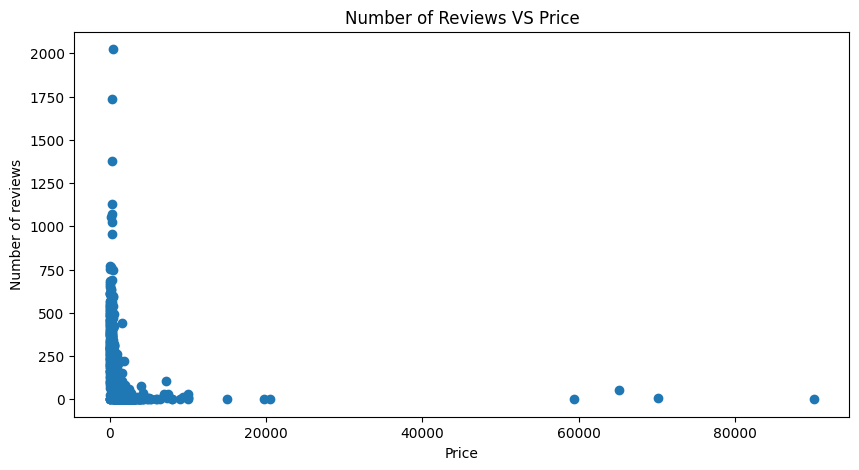

In [341]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

## From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas

### **Which hosts are the busiest and why is the reason?**

In [343]:
busy_hosts = cleaned_df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

host_id            host_name        room_type  number_of_reviews
21604  219517861         Sonder (NYC)  Entire home/apt               2024
22811  266755066            The Ridge     Private room               1734
25422  397872858                    M     Private room               1380
24279  340038896   Millennium Premier     Private room               1131
25806  417166424  Millennium Broadway     Private room               1069
17551   97086824              Miss Dy  Entire home/apt                770
5210     6642777               Martin     Private room                763
22597  259169672           Arlo NoMad       Hotel room                746
22799  266533448    Chelsea Inn Hotel     Private room                688
5480     7097558               Louise     Private room                681

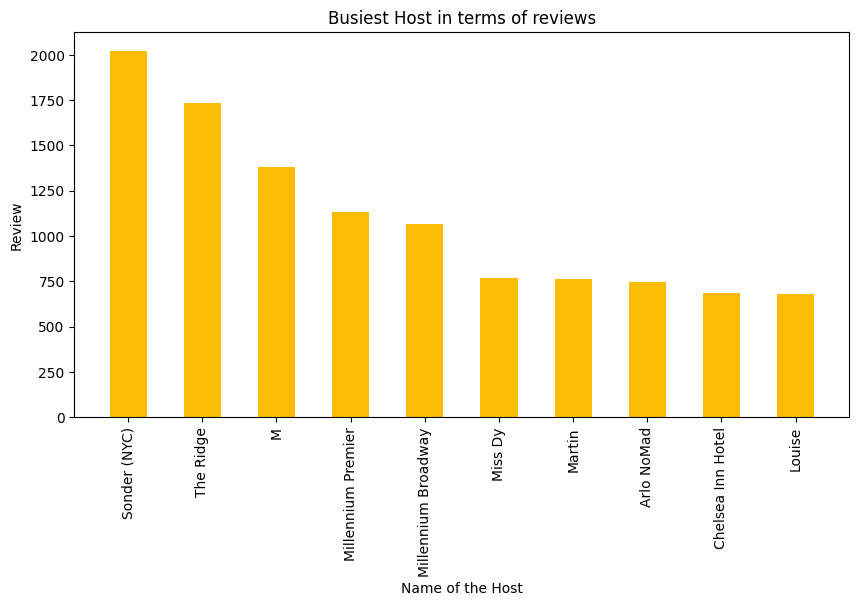

In [351]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='#fbbc05', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.xticks(rotation=90)
plt.show()

## We have found Busiest hosts : 
1. Sonder (NYC)	
2. The Ridge	
3. M
4. Millennium Premier
5. Millennium Broadway

### Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.

### **Which Hosts are charging higher price?**

In [353]:
Highest_price= cleaned_df.groupby(['host_id','host_name','room_type','host_neighbourhood'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price

host_id          host_name        room_type  host_neighbourhood    price
8477    16190490              Marie     Private room            Flushing  90120.0
9509    20278196          Stephanie     Private room       East Flatbush  70100.0
17338   92493393               Lois     Private room       West Brighton  65115.0
574       292204             Blanca  Entire home/apt         East Harlem  59386.0
1588     1261480   Doungrat (Diane)     Private room              Harlem  20500.0
12334   34906299             Lilian  Entire home/apt           Kitsilano  19750.0
24716  363776653  Marlon McWilliams  Entire home/apt  Bedford-Stuyvesant  15000.0
15263   57586379              Chris  Entire home/apt  Bedford-Stuyvesant  10000.0
23672  306024152             Son-Ya     Private room             Jamaica  10000.0
16538   76166434               Joel  Entire home/apt  Bedford-Stuyvesant  10000.0

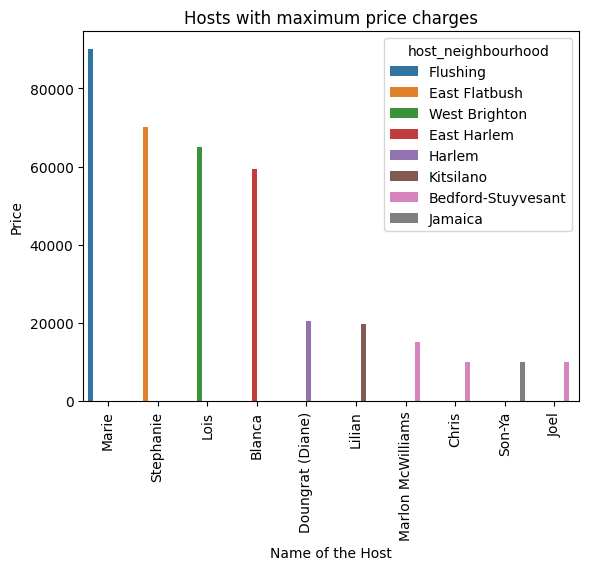

In [356]:
sns.barplot(data=Highest_price,x='host_name',y='price',hue='host_neighbourhood')
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.xticks(rotation=90)
plt.show()

### Now we have seen that 10 Hosts who are charging maximum price:
 - Marie
 - Stephanie
 - Lois
 - Blanca
 - Doungrat (Diane)
 - Lilian
 - Marlon McWilliams
 - Chris
 - Son-Ya
 - Joel 

Max Price is **90120.0** USD

### **Is there any traffic difference among different areas and what could be the reason for it?**

In [364]:
traffic_areas = cleaned_df.groupby(['host_neighbourhood','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by ='minimum_nights',ascending = False).head(10)
traffic_areas

host_neighbourhood        room_type  minimum_nights
43   Bedford-Stuyvesant  Entire home/apt            6654
45   Bedford-Stuyvesant     Private room            4554
892        Williamsburg  Entire home/apt            1209
96             Bushwick     Private room             883
893        Williamsburg     Private room             804
406             Jamaica  Entire home/apt             802
827     Upper East Side  Entire home/apt             800
284            Flatbush     Private room             736
293            Flushing     Private room             685
187       Crown Heights  Entire home/apt             665

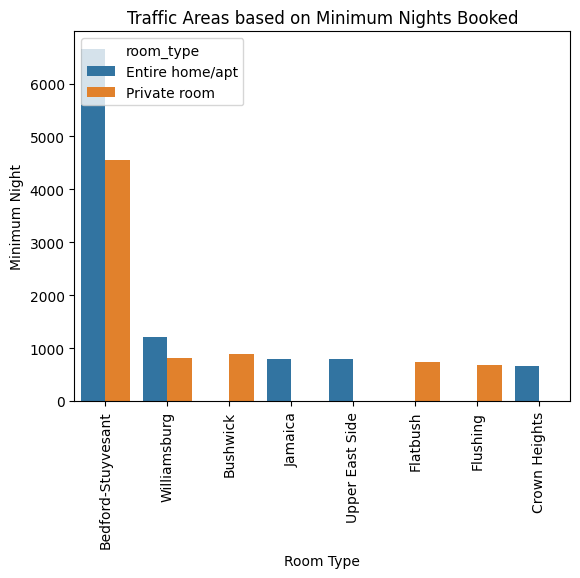

In [375]:
sns.barplot(data=traffic_areas,x='host_neighbourhood',y='minimum_nights',hue='room_type')
plt.xlabel("Room Type")
plt.ylabel("Minimum Night")
plt.title("Traffic Areas based on Minimum Nights Booked")
plt.xticks(rotation=90)
plt.show()


### From this visualization We found that most of the people likely to stay at Entire home and Private room 
### which are present in Bedford-Stuyvesant, Williamsburg & Bushwick and also vistors referring stay in room which listing price is less.

### Correlation Between Features

In [381]:
cleaned_df.corr(numeric_only=True,method = "kendall")

host_id  host_listings_count  host_total_listings_count  latitude  longitude  accommodates  bedrooms      beds     price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
host_id                                       1.000000             0.171945                   0.102468  0.039554   0.079687      0.049700  0.034509  0.052630  0.042334       -0.225074       -0.079478               -0.216752               -0.196959               -0.061968               -0.052814               -0.205682               -0.057548         0.205553         0.207475         0.214674          0.195300          -0.055078               0.121211                0.131944             -0.080243               -0.089419                  -0.043407              -0.088819                    -0.094472               -0.083054            -0.080556                        0.186624                                     0.078327                                      0.108627                                     0.038560           0.087721
host_listings_count                           0.171945             1.000000                   0.812809  0.074209  -0.017024     -0.017766  0.010940  0.005418  0.032387       -0.032180        0.000478               -0.037675                0.008581               -0.071470               -0.043966               -0.008061               -0.050682         0.164719         0.198950         0.234061          0.291666          -0.098785               0.031253               -0.018413             -0.159007               -0.172164                  -0.125436              -0.149564                    -0.180218               -0.131327            -0.181783                        0.920234                                     0.354289                                      0.405023                                     0.059556          -0.040361
host_total_listings_count                     0.102468             0.812809                   1.000000  0.075366  -0.037404     -0.027356  0.002509 -0.007235  0.034694       -0.002696        0.007248               -0.007661                0.036096               -0.069276               -0.044341                0.020474               -0.050402         0.136827         0.169298         0.203950          0.256038          -0.112861              -0.000252               -0.046284             -0.159581               -0.170641                  -0.132877              -0.148697                    -0.178167               -0.122313            -0.180588                        0.763205                                     0.307005                                      0.345591                                     0.050447          -0.068043
latitude                                      0.039554             0.074209                   0.075366  1.000000   0.020766     -0.021360 -0.059333 -0.043404  0.060056        0.045429        0.039542                0.049192                0.055414               -0.005312               -0.000800                0.049831               -0.001780        -0.025164        -0.024502        -0.015311         -0.005454          -0.065300              -0.067631               -0.057737             -0.060333               -0.062586                  -0.063525              -0.064579                    -0.059563               -0.009680            -0.067934                        0.071572                       

<Axes: >

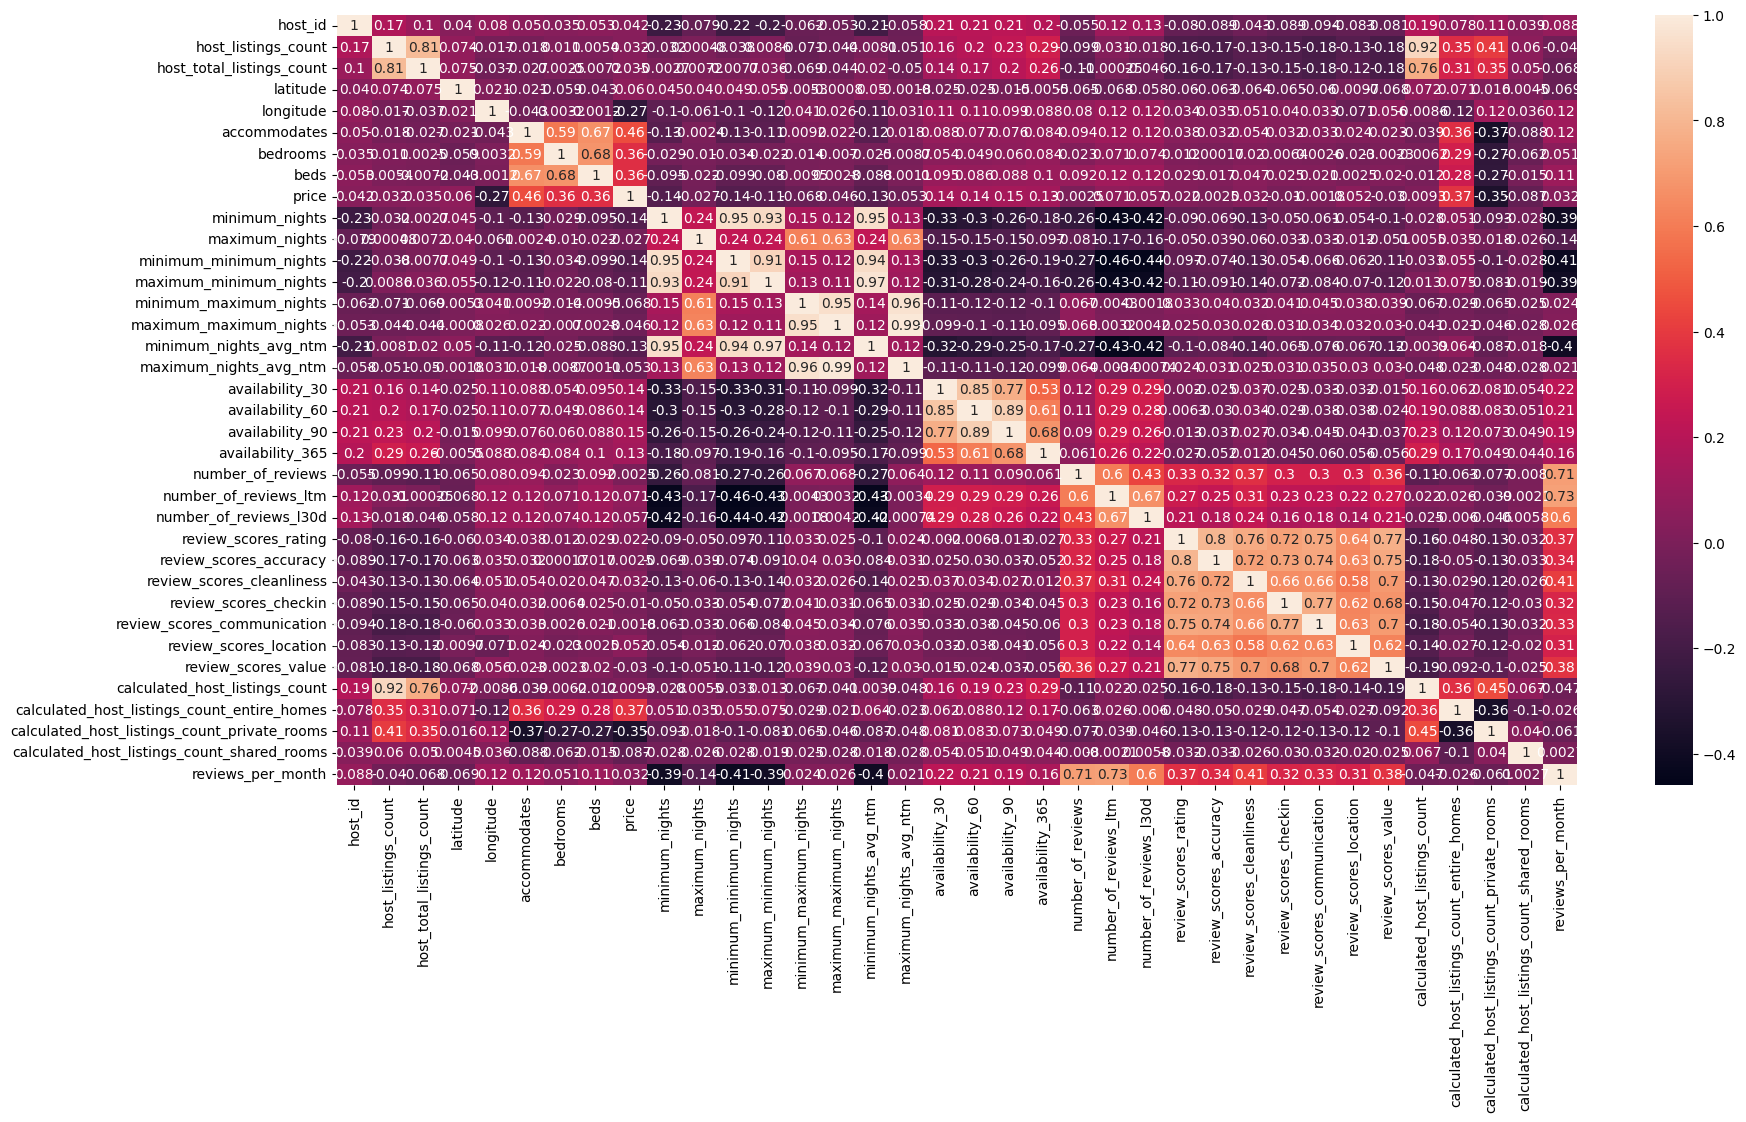

In [378]:
fig =plt.figure(figsize=(20,10))
sns.heatmap(cleaned_df.corr(numeric_only=True,method = "kendall"),annot = True)

### **What is the room count in overall NYC according to the listing of room types?**


C:\Users\dell\AppData\Local\Temp\ipykernel_14220\2405372630.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neighbourhood_room_type_count["count"])


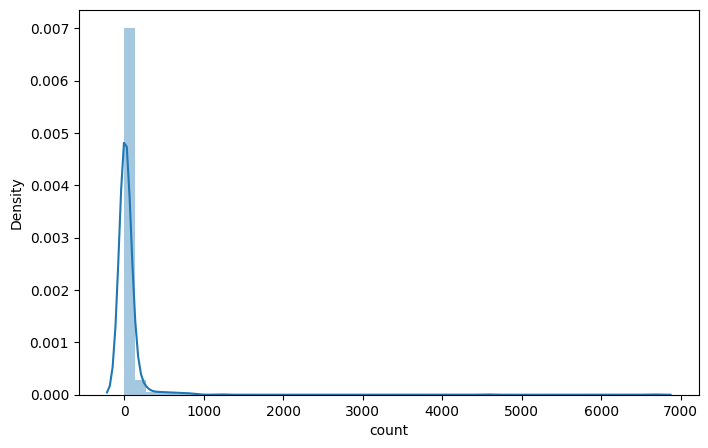

In [418]:
neighbourhood_room_type_count = cleaned_df.groupby(['host_neighbourhood'])[['host_neighbourhood','room_type']].value_counts().sort_values(ascending=False).reset_index()

res= neighbourhood_room_type_count.head(10)

sns.distplot(neighbourhood_room_type_count["count"])

plt.show()


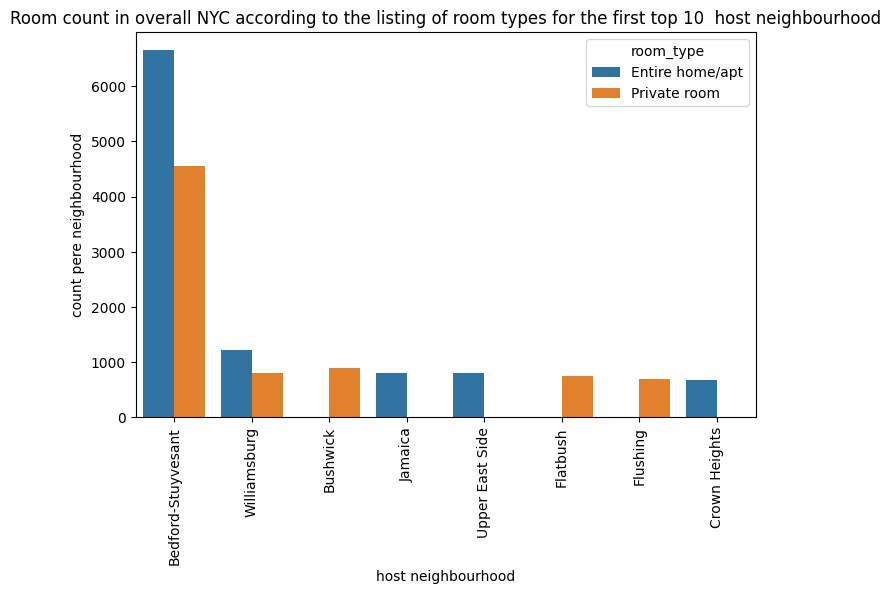

In [412]:
sns.barplot(data=res,x='host_neighbourhood',y='count',hue='room_type')
plt.xlabel("host neighbourhood")
plt.ylabel("count pere neighbourhood")
plt.title("Room count in overall NYC according to the listing of room types for the first top 10  host neighbourhood")
plt.xticks(rotation=90)
plt.show()


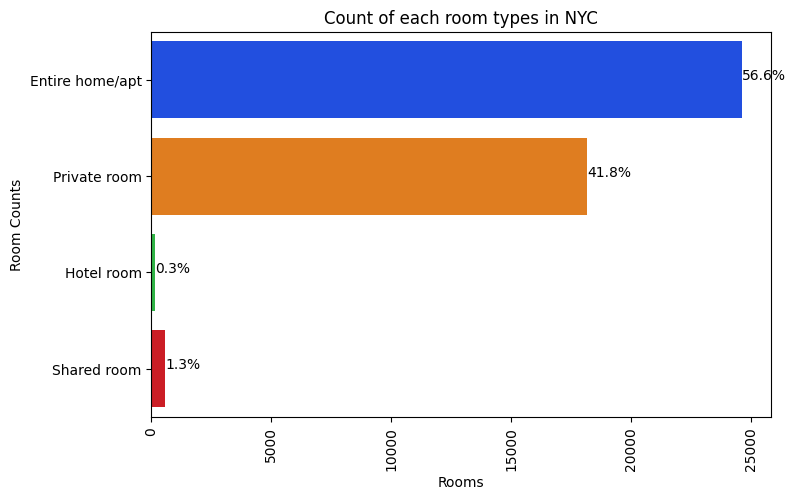

In [387]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',data=cleaned_df,palette='bright')

total = len(cleaned_df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

## **What can we learn from predictions? (ex: locations, prices, reviews, etc)**

**First we will try to visualize the location of each apprtment usinglatitude and longitude values**

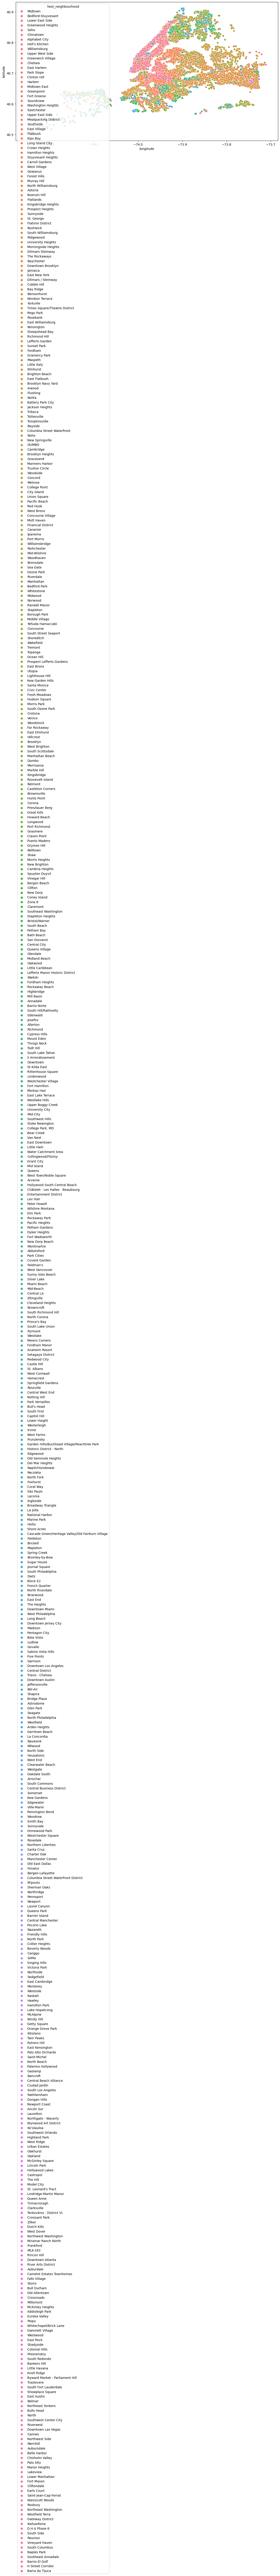

In [424]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=cleaned_df,x='longitude',y='latitude', hue='host_neighbourhood')
plt.show()

### **What is the distribution of the room type and its distribution over the location  ?** 

<Axes: xlabel='room_type'>

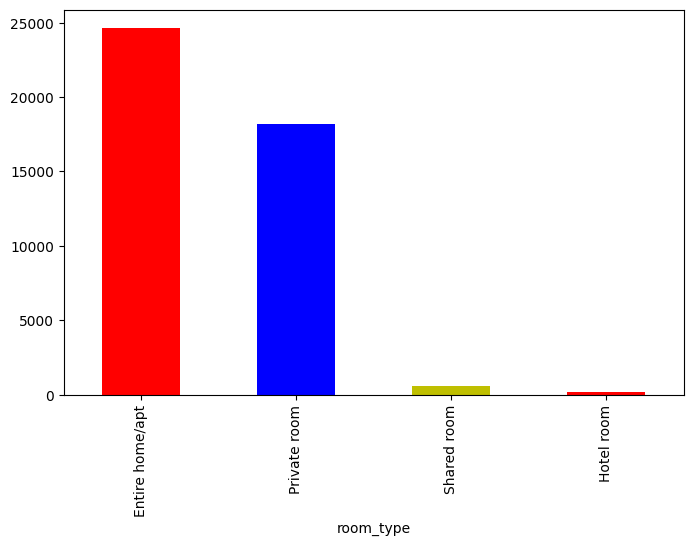

In [425]:
plt.figure(figsize=(8,5))
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

#### **So  we can notice the following** 

#### **1) that maximum numbers of room are Entire home/Apartment and Private room there are only few shared rooms .** 

#### **2)So mostly host prefer to give Entire home/Appartment or Private Rooms rather than Shared rooms**

**lets see how room_type is distributed over all location ,is there any place where there is a dominance of any particular room_type over the others despite of thier overall ratios ?**

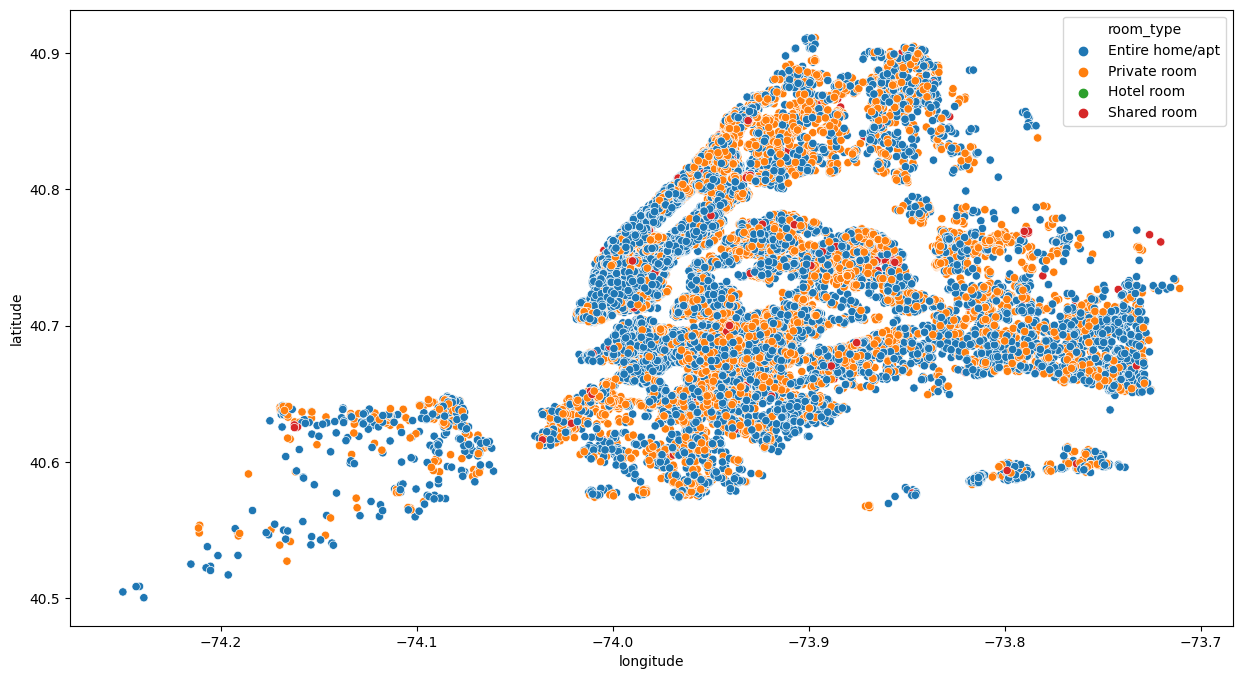

In [426]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=cleaned_df['longitude'],y=cleaned_df['latitude'], hue=cleaned_df['room_type'])
plt.show()

**lets see how property_type is distributed over all location ,is there any place where there is a dominance of any particular property_type over the others despite of thier overall ratios ?**

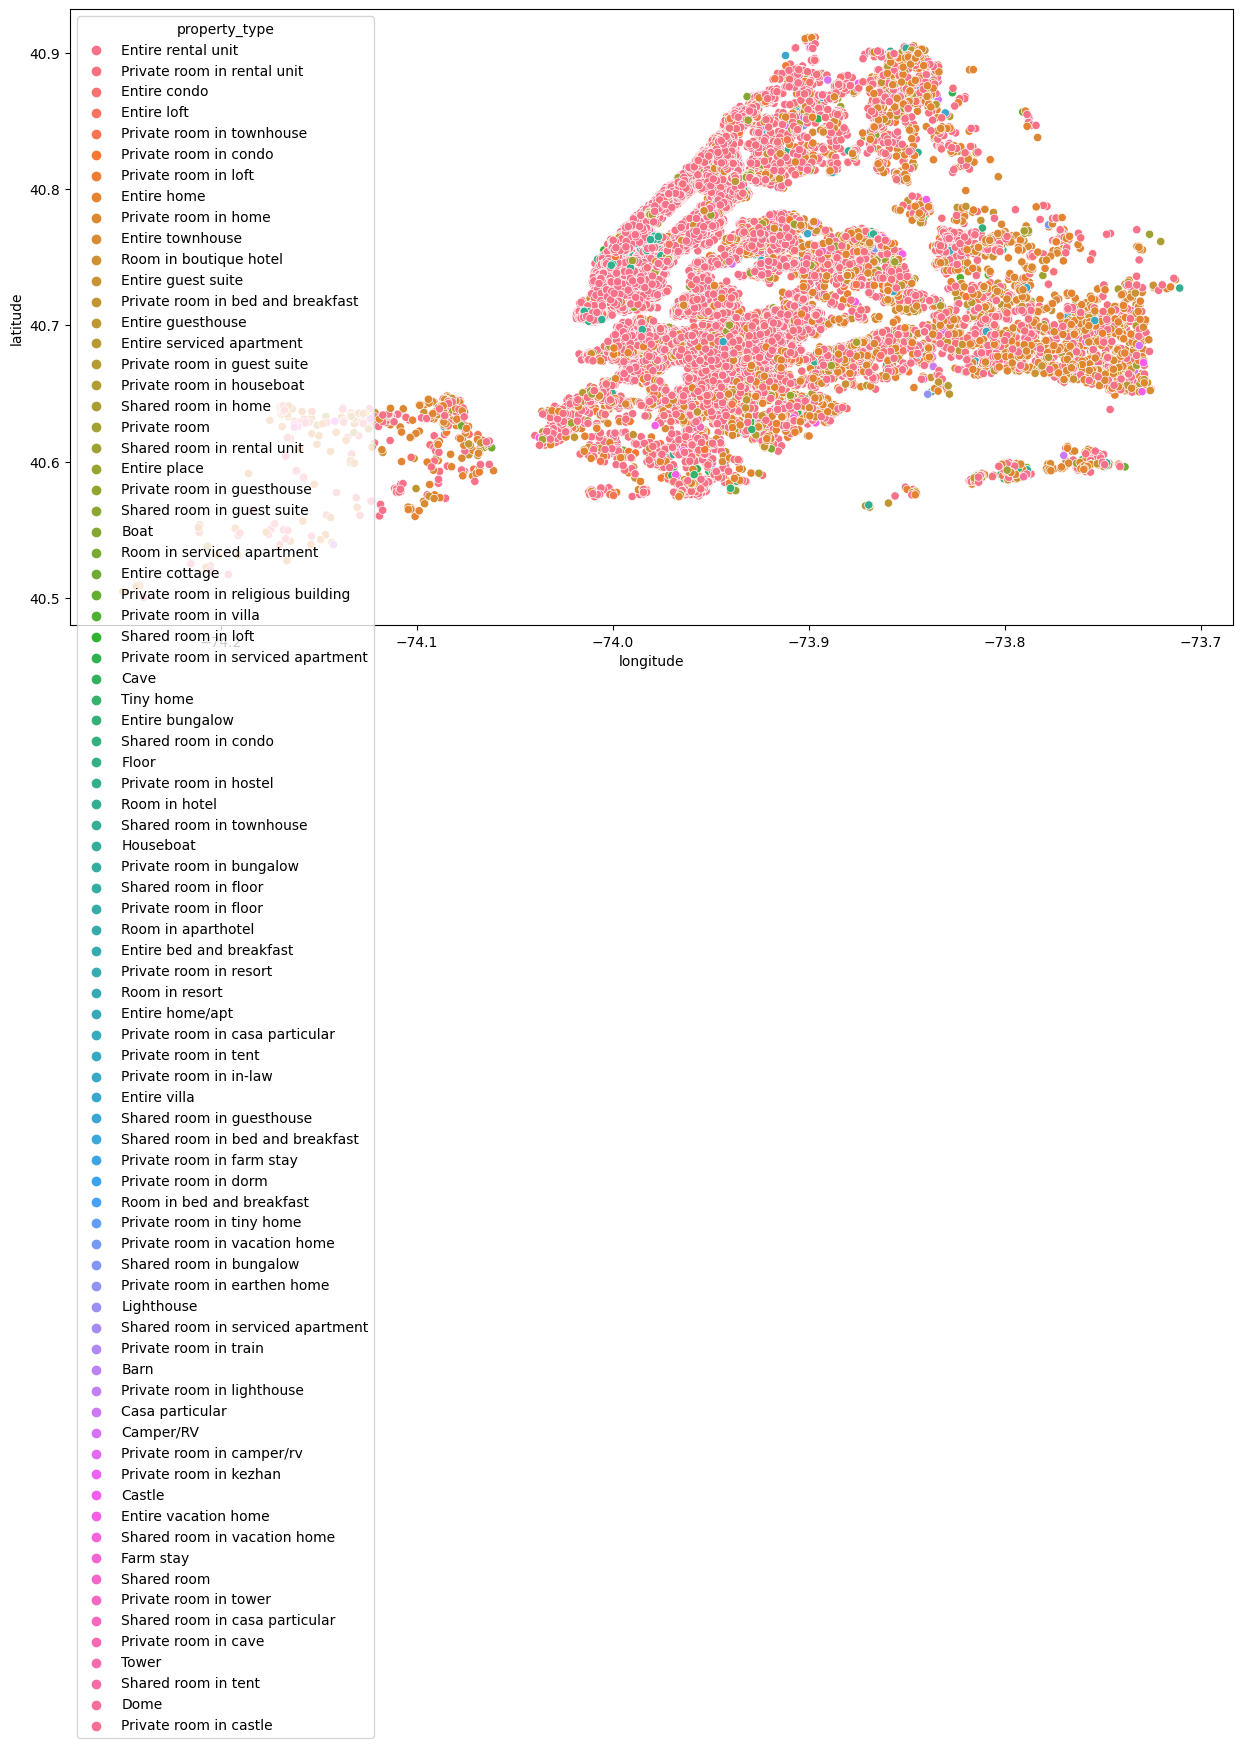

In [428]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=cleaned_df['longitude'],y=cleaned_df['latitude'], hue=cleaned_df['property_type'])
plt.show()

In [440]:
cleaned_df.columns

Index(['name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_sc

In [443]:
avg_month_length = 30
cleaned_df['availability_30'] = cleaned_df.availability_365 / avg_month_length

cleaned_df['max_possible_bookings'] = cleaned_df.availability_365 / df.minimum_nights
cleaned_df['booking_estimate'] = cleaned_df.number_of_reviews_l30d * cleaned_df.availability_30


cleaned_df = cleaned_df[cleaned_df.booking_estimate <= cleaned_df.max_possible_bookings]

cleaned_df['occupancy_percentage'] = (cleaned_df.booking_estimate / cleaned_df.max_possible_bookings) * 100
cleaned_df.head(1)

C:\Users\dell\AppData\Local\Temp\ipykernel_14220\745100554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['availability_30'] = cleaned_df.availability_365 / avg_month_length
C:\Users\dell\AppData\Local\Temp\ipykernel_14220\745100554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['max_possible_bookings'] = cleaned_df.availability_365 / df.minimum_nights
C:\Users\dell\AppData\Local\Temp\ipykernel_14220\745100554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

name  host_id host_name  host_since  host_location host_response_time host_response_rate host_acceptance_rate host_is_superhost host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_identity_verified            neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates bathrooms_text  bedrooms  beds  \
0  Rental unit in New York · ★4.68 · Studio · 1 bed · 1 bath     2845  Jennifer  2008-09-09  Woodstock, NY       within a day                71%                  22%                 f            Midtown                  7.0                        9.0  ['email', 'phone', 'work_email']                      t  New York, United States                Midtown                    Manhattan  40.75356  -73.98559  Entire rental unit  Entire home/apt             1         1 bath       1.0   1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0  ["Dedicated workspace", "Baking sheet", "Extra pillows and blankets", "Cleaning available during stay", "Essentials", "Hair dryer", "Free street parking", "TV", "Air conditioning", "Long term stays allowed", "Refrigerator", "Keypad", "Heating", "Ethernet connection", "Paid parking off premises", "Stove", "Bed linens", "Bathtub", "Iron", "Dishes and silverware", "Self check-in", "Smoke alarm", "Fire extinguisher", "Wifi", "Cooking basics", "Hangers", "Kitchen", "Oven", "Carbon monoxide alarm", "Luggage dropoff allowed", "Coffee maker", "Hot water"]  240.0              30            1125                    30.0                    30.0                  1125.0                  1125.0                    30.0                  1125.0                t        10.833333               20               50               325                 49                      1                       0   2009-11-21  2022-06-21                  4.68                    4.73                       4.63   

   review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month  max_possible_bookings  booking_estimate  occupancy_percentage  
0                   4.77                          4.8                    4.81                  4.4                f                               3                                            3                                             0                                            0                0.3              10.833333               0.0                   0.0